# PERNYATAAN MASALAH

Transjakarta adalah sistem Bus Rapid Transit (BRT) pertama di Asia Tenggara dan Selatan yang mulai beroperasi di Jakarta, Indonesia pada tahun 2004. Sistem ini dirancang untuk mendukung aktivitas padat di ibu kota sebagai alternatif transportasi massal. Transjakarta memiliki 273 halte yang tersebar di 13 koridor utama. Awalnya beroperasi dari pukul 05.00 hingga 22.00 WIB, kini sistem ini beroperasi selama 24 jam sehari di semua koridornya.<br>
<br>
<br>
Masalah yang dihadapi PT. Transjakarta mencakup beberapa isu utama yang perlu diatasi untuk meningkatkan pelayanan bagi para penumpang:<br>
•	Kasus pelecehan seksual terhadap penumpang perempuan. Referensi : https://megapolitan.kompas.com/read/2023/05/17/10564451/saat-kasus-pelecehan-seksual-lagi-lagi-terjadi-di-dalam-bus-transjakarta?page=all <br>
•	Peningkatan jumlah penumpang Transjakarta yang menyebabkan bus-bus menjadi penuh dan sesak, membuat penumpang merasa tidak nyaman baik saat didalam bus maupun saat menunggu bus. Referensi : https://tangselpos.id/detail/9540/penumpang-bete-nunggu-bus-transjakarta-45-menit  <br>
<br>
<br>

Analisis pengguna dan pola perjalanan akan difokuskan untuk menemukan solusi yang efektif dan memperbaiki pengalaman pengguna. Beberapa aspek yang perlu dianalisis meliputi:<br>
<br>
1. Profil Pengguna Transjakarta berdasarkan gender:

    - Bagaimana proporsi pengguna Transjakarta berdasarkan gender?
    - Koridor manakah yang paling sering digunakan berdasarkan gender khususnya penumpang perempuan?

2. Peak Hour:
    - Kapan puncak jam sibuk penggunaan Transjakarta sehingga menyebabkan kepadatan penumpang?.
    - Koridor manakah yang sering digunakan pada jam sibuk?.
    - Halte manakah yang sering digunakan pada jam sibuk?.

Analisis ini akan membantu mengidentifikasi masalah utama dan merumuskan langkah-langkah untuk meningkatkan efisiensi, kualitas layanan, dan mendorong masyarakat untuk menggunakan transportasi publik yang secara kontributif juga dapat meningkatkan revenue Transjakarta.

Dataset ini berisi informasi tentang transaksi, termasuk detail pribadi, rute yang diambil, dan biaya yang dikeluarkan. Dataset Transjakarta terdiri dari 22 kolom, yaitu:

1. `transID:`ID transaksi yang bersifat unik untuk setiap transaksi.

2. `payCardID:` ID pengguna yang merupakan kartu masuk dan keluar dari pengguna.

3. `payCardBank:` Nama bank penerbit kartu pembayaran pelanggan.

4. `payCardName:` Nama pengguna yang tercetak di kartu.

5. `payCardSex:` Jenis kelamin pengguna yang tercetak di kartu.

6. `payCardBirthDate:` Tahun kelahiran pengguna kartu.

7. `corridorID:` Kode jenis rute.

8. `corridorName:` Nama rute beserta start dan finis.

9. `direction:` Arah rute, dimana 0 untuk pergi & 1 untuk pulang

10. `tapInStops:` ID halte pengguna tapIn (masuk).

11. `tapInStopsName:` Nama halte tempat pengguna tapIn (masuk)

12. `tapInStopsLat:` Garis lintang (Latitude) halte tap-in.

13. `tapInStopsLon:` Garis bujur (Longitude) halte tap-in.

14. `stopStartSeq:` Posisi halte awal dalam rute perjalanan pengguna pada saat melakukan tap-in. 

15. `tapInTime:` Waktu ketika pengguna melakukan tap-in. Mencakup informasi tanggal dan jam.

16. `tapOutStops:` ID halte pengguna tapOut (keluar).

17. `tapOutStopsName:` Nama halte tempat pengguna tapOut (keluar).

18. `tapOutStopsLat:` Garis lintang (Latitude) halte tap-out.

19. `tapOutStopsLon:` Garis bujur (Longitude) halte tap-out.

20. `stopEndSeq:` posisi halte akhir dalam rute perjalanan pengguna pada saat melakukan tapOut. 

21. `tapOutTime:` Waktu ketika pengguna melakukan tap-out.  Mencakup informasi tanggal dan jam.

22. `payAmount:` adalah total pembayaran yang harus dibayarkan oleh pengguna.


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno
import plotly.express as px
from scipy.stats import normaltest, chi2_contingency, mannwhitneyu, ttest_ind
import folium


import warnings
warnings.filterwarnings("ignore")

# **DATA**

In [2]:
df=pd.read_csv('/Users/hizkiasimaremare/Documents/PURWADHIKA/Modul 2/Capstone 2/Transjakarta.csv')
display(df.head())

,transID,payCardID,payCardBank,payCardName,payCardSex,payCardBirthDate,corridorID,corridorName,direction,tapInStops,...,tapInStopsLon,stopStartSeq,tapInTime,tapOutStops,tapOutStopsName,tapOutStopsLat,tapOutStopsLon,stopEndSeq,tapOutTime,payAmount
0,EIIW227B8L34VB,180062659848800,emoney,Bajragin Usada,M,2008,5,Matraman Baru - Ancol,1.0,P00142,...,106.84402,7,2023-04-03 05:21:44,P00253,Tegalan,-6.203101,106.85715,12.0,2023-04-03 06:00:53,3500.0
1,LGXO740D2N47GZ,4885331907664776,dki,Gandi Widodo,F,1997,6C,Stasiun Tebet - Karet via Patra Kuningan,0.0,B01963P,...,106.83302,13,2023-04-03 05:42:44,B03307P,Sampoerna Strategic,-6.217152,106.81892,21.0,2023-04-03 06:40:01,3500.0
2,DJWR385V2U57TO,4996225095064169,dki,Emong Wastuti,F,1992,R1A,Pantai Maju - Kota,0.0,B00499P,...,106.81435,38,2023-04-03 05:59:06,B04962P,Simpang Kunir Kemukus,-6.133731,106.81475,39.0,2023-04-03 06:50:55,3500.0
3,JTUZ800U7C86EH,639099174703,flazz,Surya Wacana,F,1978,11D,Pulo Gebang - Pulo Gadung 2 via PIK,0.0,B05587P,...,106.93526,23,2023-04-03 05:44:51,B03090P,Raya Penggilingan,-6.183068,106.93194,29.0,2023-04-03 06:28:16,3500.0
4,VMLO535V7F95NJ,570928206772,flazz,Embuh Mardhiyah,M,1982,12,Tanjung Priok - Pluit,0.0,P00239,...,106.88900,5,2023-04-03 06:17:35,P00098,Kali Besar Barat,-6.135355,106.81143,15.0,2023-04-03 06:57:03,3500.0


In [3]:
df.tail()

,transID,payCardID,payCardBank,payCardName,payCardSex,payCardBirthDate,corridorID,corridorName,direction,tapInStops,...,tapInStopsLon,stopStartSeq,tapInTime,tapOutStops,tapOutStopsName,tapOutStopsLat,tapOutStopsLon,stopEndSeq,tapOutTime,payAmount
37895,ZWEC949B8Q87QG,4685818286724028395,brizzi,Kamila Mahendra,F,2004,6B,Ragunan - MH Thamrin via Semanggi,1.0,P00261,...,106.82309,2,2023-04-21 18:18:37,P00228,SMK 57,-6.290967,106.82365,13.0,2023-04-21 19:55:49,3500.0
37896,YHHK837P6Y95GN,6502902290603767,dki,Titi Siregar,M,1974,9N,Pinang Ranti - Pramuka,1.0,P00064,...,106.88116,1,2023-04-18 21:52:31,P00179,Pinang Ranti,-6.291075,106.88634,2.0,2023-04-18 22:28:22,3500.0
37897,YXPP627N4G95HO,213159426675861,emoney,drg. Zahra Nashiruddin,F,1976,1T,Cibubur - Balai Kota,1.0,B02873P,...,106.81676,12,2023-04-04 10:29:47,B00226P,Buperta Cibubur,-6.370321,106.89628,14.0,2023-04-04 13:27:25,20000.0
37898,RGVK175U2U98UV,377840859133591,emoney,Ana Agustina,M,1976,JAK.13,Tanah Abang - Jembatan Lima,1.0,B02505P,...,106.80954,33,2023-04-15 19:59:26,B01787P,JPO Blok G,-6.188861,106.81135,34.0,2023-04-15 20:27:50,0.0
37899,FMZZ963S4B68ZP,501862539795,flazz,drg. Leo Najmudin,F,1985,13,Ciledug - Tendean,0.0,P00001,...,106.74786,2,2023-04-12 21:08:12,P00106,Kebayoran Lama,-6.238340,106.77752,7.0,2023-04-12 21:34:53,3500.0


# **DATA UNDERSTANDING & CLEANING**

Sebelum memulai analisis, kita harus untuk memahami dataset, melihat duplikasi maupun missing value lalu merencanakan strategi penanganannya, sebelum dilakukan analisis lebih lanjut.

In [4]:
print(f'Jumlah baris dan kolom di dataset df adalah {df.shape}\n')
df.info()

Jumlah baris dan kolom di dataset df adalah (37900, 22)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 37900 entries, 0 to 37899
Data columns (total 22 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   transID           37900 non-null  object 
 1   payCardID         37900 non-null  int64  
 2   payCardBank       37900 non-null  object 
 3   payCardName       37900 non-null  object 
 4   payCardSex        37900 non-null  object 
 5   payCardBirthDate  37900 non-null  int64  
 6   corridorID        36643 non-null  object 
 7   corridorName      35970 non-null  object 
 8   direction         37900 non-null  float64
 9   tapInStops        36687 non-null  object 
 10  tapInStopsName    37900 non-null  object 
 11  tapInStopsLat     37900 non-null  float64
 12  tapInStopsLon     37900 non-null  float64
 13  stopStartSeq      37900 non-null  int64  
 14  tapInTime         37900 non-null  object 
 15  tapOutStops       35611 non-nu

In [5]:
listItem = []
for col in df.columns :
    listItem.append([col, df[col].dtype, df[col].isna().sum(),
                    df[col].nunique(), list(df[col].drop_duplicates().sample(2))]);

dfDesc = pd.DataFrame(columns=['dataFeatures', 'dataType', 'null', 'unique', 'uniqueSample'],
                     data=listItem)
print(df.shape)
dfDesc

(37900, 22)


,dataFeatures,dataType,null,unique,uniqueSample
0,transID,object,0,37900,"[PZAZ441R6I31RJ, KJPM633R3S23OC]"
1,payCardID,int64,0,2000,"[6510567196644064, 4197520568098]"
2,payCardBank,object,0,6,"[bni, dki]"
3,payCardName,object,0,1993,"[Martaka Wijaya, R.M. Simon Wastuti, S.T.]"
4,payCardSex,object,0,2,"[F, M]"
5,payCardBirthDate,int64,0,67,"[1962, 1994]"
6,corridorID,object,1257,221,"[3, 10B]"
7,corridorName,object,1930,216,"[Rusun Pondok Bambu - Walikota Jakarta Timur, ..."
8,direction,float64,0,2,"[0.0, 1.0]"
9,tapInStops,object,1213,2570,"[B01860P, B01522P]"


In [6]:
df.isna().sum()


transID                0
payCardID              0
payCardBank            0
payCardName            0
payCardSex             0
payCardBirthDate       0
corridorID          1257
corridorName        1930
direction              0
tapInStops          1213
tapInStopsName         0
tapInStopsLat          0
tapInStopsLon          0
stopStartSeq           0
tapInTime              0
tapOutStops         2289
tapOutStopsName     1344
tapOutStopsLat      1344
tapOutStopsLon      1344
stopEndSeq          1344
tapOutTime          1344
payAmount           1007
dtype: int64

### Mengecek Data Duplikat

In [7]:
df.duplicated().sum()


0

In [8]:
missing_values = df.isnull().sum()

missing_percentage = (df.isnull().sum() / len(df)) * 100

missing_info = pd.DataFrame({'Missing Values': missing_values, 'Percentage (%)': missing_percentage}).sort_values(by='Percentage (%)', ascending=False)
missing_info

,Missing Values,Percentage (%)
tapOutStops,2289,6.039578
corridorName,1930,5.092348
tapOutTime,1344,3.546174
stopEndSeq,1344,3.546174
tapOutStopsLon,1344,3.546174
tapOutStopsLat,1344,3.546174
tapOutStopsName,1344,3.546174
corridorID,1257,3.316623
tapInStops,1213,3.200528
payAmount,1007,2.656992


<Axes: >

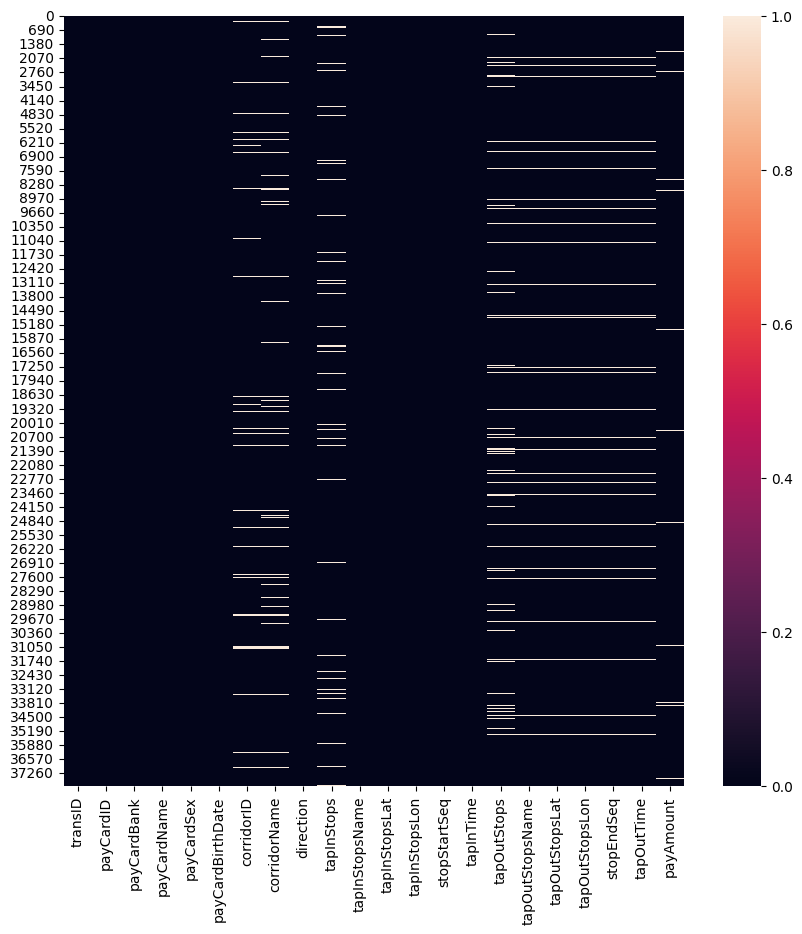

In [9]:
plt.figure(figsize=(10,10))
sns.heatmap(df[['transID', 'payCardID', 'payCardBank', 'payCardName', 'payCardSex', 'payCardBirthDate', 'corridorID', 'corridorName', 'direction', 'tapInStops', 'tapInStopsName', 'tapInStopsLat', 'tapInStopsLon', 'stopStartSeq', 'tapInTime', 'tapOutStops', 'tapOutStopsName', 'tapOutStopsLat', 'tapOutStopsLon', 'stopEndSeq', 'tapOutTime', 'payAmount']].isna())

* *missing value* di kolom `corridorID`, `corridorName`, `tapInStops`, `tapOutStops`, `tapOutStopsName`, `tapOutStopsLat`, `tapOutStopsLon`,
`stopEndSeq`, `tapOutTime` dan `payAmount` memiliki proporsi antara 2-16%.


<Axes: >

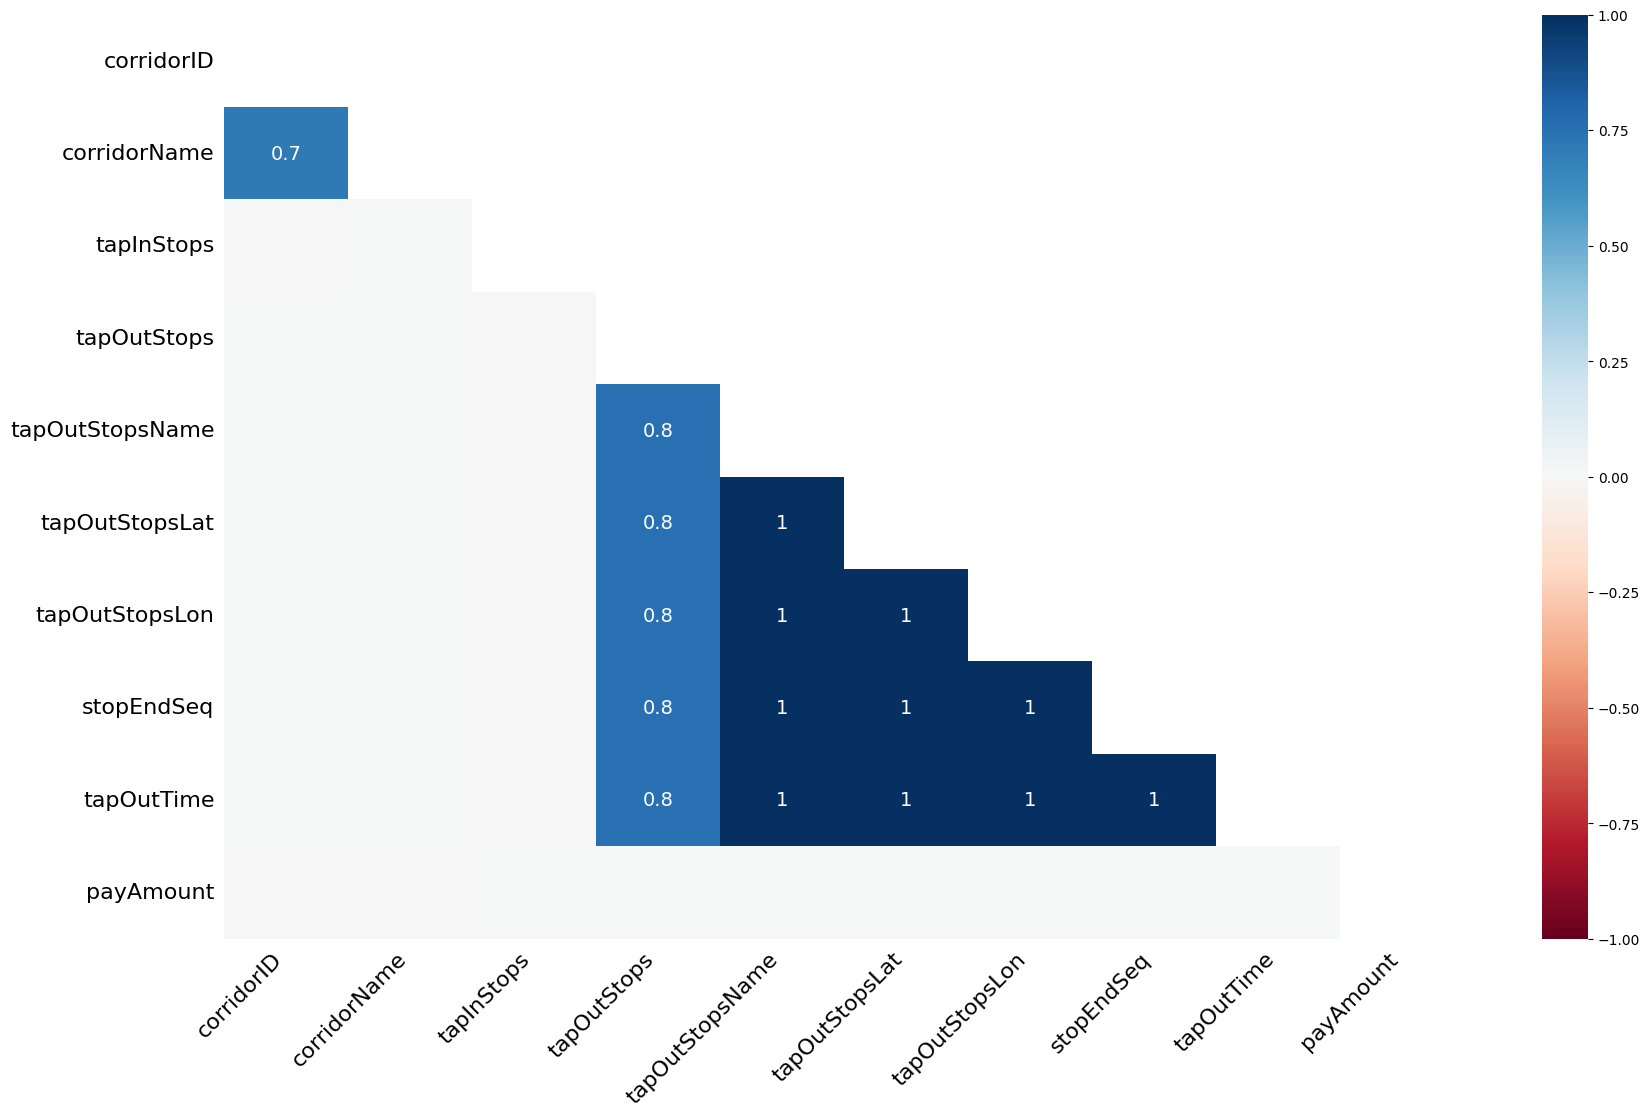

In [10]:
msno.heatmap(df[['corridorID', 'corridorName', 'tapInStops', 'tapOutStops', 'tapOutStopsName', 'tapOutStopsLat', 'tapOutStopsLon',
'stopEndSeq', 'tapOutTime', 'payAmount']])

Tabel ini menjelaskan korelasi kekosongan data antara 1 variabel dan variabel lainnya. Misalnya jika ada data kosong di kolom `tapOutStopsName` dapat dipastikan data di kolom `tapOutTime`akan mengalami kekosongan.

Berikut penjelasan mengenai HeatMap : <br> <br>
- Nilai yang mendekati -1 berarti jika salah satu variabel muncul maka kemungkinan besar variabel lainnya hilang. <br> <br>
- Nilai yang mendekati 0 berarti tidak ada ketergantungan antara terjadinya nilai yang hilang dari dua variabel. <br> <br>
- Nilai yang mendekati 1 berarti jika salah satu variabel muncul maka kemungkinan besar variabel lainnya akan hadir. <br> <br>
(Sumber : https://www.geeksforgeeks.org/python-visualize-missing-values-nan-values-using-missingno-library/)

> ### Mengisi missing values payAmount dengan corridorID

In [11]:
 # There are 3 unique values for payAmount, probably it's based on the type of vehicle/ TransJakarta

unique_categories = df['payAmount'].unique()
unique_categories

array([ 3500., 20000.,     0.,    nan])


Setelah melakukan penelitian di internet, berikut adalah harga dari 3 jenis Transportasi Umum TransJakarta:

- Busway = IDR 3500 atau harga umum/tetap
- RoyalTrans = IDR 20000, hanya untuk beberapa rute (Royal Trans)
- Mikrotrans = IDR 0

Mari kita buat kolom baru untuk jenis kendaraan

In [12]:
# Buat kolom baru untuk tipe kendaraan/TransJakarta:
def type_Trans (payAmount) :
    if payAmount == 3500:
        return 'Busway'
    elif payAmount == 20000:
        return 'RoyalTrans'
    else:
        return 'Mikrotrans'
    
df['transType'] = df['payAmount'].apply(type_Trans)

df.head()

,transID,payCardID,payCardBank,payCardName,payCardSex,payCardBirthDate,corridorID,corridorName,direction,tapInStops,...,stopStartSeq,tapInTime,tapOutStops,tapOutStopsName,tapOutStopsLat,tapOutStopsLon,stopEndSeq,tapOutTime,payAmount,transType
0,EIIW227B8L34VB,180062659848800,emoney,Bajragin Usada,M,2008,5,Matraman Baru - Ancol,1.0,P00142,...,7,2023-04-03 05:21:44,P00253,Tegalan,-6.203101,106.85715,12.0,2023-04-03 06:00:53,3500.0,Busway
1,LGXO740D2N47GZ,4885331907664776,dki,Gandi Widodo,F,1997,6C,Stasiun Tebet - Karet via Patra Kuningan,0.0,B01963P,...,13,2023-04-03 05:42:44,B03307P,Sampoerna Strategic,-6.217152,106.81892,21.0,2023-04-03 06:40:01,3500.0,Busway
2,DJWR385V2U57TO,4996225095064169,dki,Emong Wastuti,F,1992,R1A,Pantai Maju - Kota,0.0,B00499P,...,38,2023-04-03 05:59:06,B04962P,Simpang Kunir Kemukus,-6.133731,106.81475,39.0,2023-04-03 06:50:55,3500.0,Busway
3,JTUZ800U7C86EH,639099174703,flazz,Surya Wacana,F,1978,11D,Pulo Gebang - Pulo Gadung 2 via PIK,0.0,B05587P,...,23,2023-04-03 05:44:51,B03090P,Raya Penggilingan,-6.183068,106.93194,29.0,2023-04-03 06:28:16,3500.0,Busway
4,VMLO535V7F95NJ,570928206772,flazz,Embuh Mardhiyah,M,1982,12,Tanjung Priok - Pluit,0.0,P00239,...,5,2023-04-03 06:17:35,P00098,Kali Besar Barat,-6.135355,106.81143,15.0,2023-04-03 06:57:03,3500.0,Busway


In [13]:
# Chechking wich corridor commuting using Royal Trans (IDR 20000) in which coridorName :
df.loc[df['payAmount'] == 20000.0]['corridorName'].unique()

array(['Cibubur - Balai Kota', 'Bekasi Barat - Kuningan', nan,
       'Palem Semi - Bundaran Senayan', 'Cinere - Bundaran Senayan',
       'Bintaro - Fatmawati', 'Bekasi Barat - Blok M',
       'Cinere - Kuningan', 'Cibubur Junction - Blok M',
       'Cibubur - Kuningan', 'BSD Serpong - Fatmawati'], dtype=object)

In [14]:
corridor_royal = ['Cibubur - Balai Kota', 'Bekasi Barat - Kuningan',
       'Palem Semi - Bundaran Senayan', 'Cinere - Bundaran Senayan',
       'Bintaro - Fatmawati', 'Senen - Blok M',
       'Stasiun Tebet - Karet via Patra Kuningan', 'Cibubur - BKN',
       'Bekasi Barat - Blok M', 'Cinere - Kuningan',
       'Cibubur Junction - Blok M', 'Cibubur - Kuningan',
       'BSD Serpong - Fatmawati', 'Tanah Abang - Blok M']


# fill pay amount function
def fill_pay_amount(row):
    if row['corridorName'] in corridor_royal and pd.isna(row['payAmount']):
        return 20000
    elif pd.isna(row['payAmount']):
        return 3500
    else:
        return row['payAmount']
    
#apply function
df['payAmount'] = df.apply(fill_pay_amount, axis=1)

In [15]:
df.isna().sum()


transID                0
payCardID              0
payCardBank            0
payCardName            0
payCardSex             0
payCardBirthDate       0
corridorID          1257
corridorName        1930
direction              0
tapInStops          1213
tapInStopsName         0
tapInStopsLat          0
tapInStopsLon          0
stopStartSeq           0
tapInTime              0
tapOutStops         2289
tapOutStopsName     1344
tapOutStopsLat      1344
tapOutStopsLon      1344
stopEndSeq          1344
tapOutTime          1344
payAmount              0
transType              0
dtype: int64

> ### Mengisi missing values corridorID berdasarkan corridorName


In [16]:
#mapping utk liat identitas koridor berdasarkan nama dan id koridor
missing_corridor_id_mapping = df.drop_duplicates('corridorName').dropna(subset=['corridorID'])
missing_corridor_id_mapping = missing_corridor_id_mapping.set_index('corridorName')['corridorID']
missing_corridor_id_mapping = missing_corridor_id_mapping.reset_index()
missing_corridor_id_mapping

,corridorName,corridorID
0,Matraman Baru - Ancol,5
1,Stasiun Tebet - Karet via Patra Kuningan,6C
2,Pantai Maju - Kota,R1A
3,Pulo Gebang - Pulo Gadung 2 via PIK,11D
4,Tanjung Priok - Pluit,12
...,...,...
211,Grogol - Pos Pengumben via Slipi,JAK.53
212,Senen - Tanah Abang,1R
213,Kampung Rambutan - Blok M,7B
214,Term. Pulo Gadung - Lampiri,JAK.99


In [17]:
missing_corridor_id_mapping[missing_corridor_id_mapping['corridorName'] == "Matraman Baru - Ancol"]

,corridorName,corridorID
0,Matraman Baru - Ancol,5


In [18]:
#isi corridor id - corridor name function
def fill_corridor_id(row):
    if pd.isnull(row['corridorID']) and pd.notnull(row['corridorName']):
        return missing_corridor_id_mapping.get(row['corridorName'])
    return row['corridorID']

#apply fill function
df['corridorID'] = df.apply(fill_corridor_id, axis=1)

> ### Mengisi missing values corridorName dengan corridorID


In [19]:
#mapping corridor name dengan corridor id
corridor_name_mapping = df.dropna(subset=['corridorName']).drop_duplicates('corridorID')
corridor_name_mapping = corridor_name_mapping.set_index('corridorID')['corridorName']
corridor_name_mapping = corridor_name_mapping.reset_index()
corridor_name_mapping

,corridorID,corridorName
0,5,Matraman Baru - Ancol
1,6C,Stasiun Tebet - Karet via Patra Kuningan
2,R1A,Pantai Maju - Kota
3,11D,Pulo Gebang - Pulo Gadung 2 via PIK
4,12,Tanjung Priok - Pluit
...,...,...
217,1R,Senen - Tanah Abang
218,7B,Kampung Rambutan - Blok M
219,M5,Matraman Baru - Ancol
220,JAK.99,Term. Pulo Gadung - Lampiri


In [20]:
def fill_missing_corridor_name(row):
    if pd.isnull(row['corridorName']) and pd.notnull(row['corridorID']):
        return corridor_name_mapping.get(row['corridorID'])
    return row['corridorName']

#apply function
df['corridorName'] = df.apply(fill_missing_corridor_name, axis=1)

In [21]:
df['corridorName'].isnull().sum()


1930

In [22]:
missing_values = df.isnull().sum()

missing_percentage = (df.isnull().sum() / len(df)) * 100

missing_info = pd.DataFrame({'Missing Values': missing_values, 'Percentage (%)': missing_percentage}).sort_values(by='Percentage (%)', ascending=False)
missing_info

,Missing Values,Percentage (%)
tapOutStops,2289,6.039578
corridorName,1930,5.092348
tapOutTime,1344,3.546174
stopEndSeq,1344,3.546174
tapOutStopsLon,1344,3.546174
tapOutStopsLat,1344,3.546174
tapOutStopsName,1344,3.546174
corridorID,1257,3.316623
tapInStops,1213,3.200528
transID,0,0.000000


### Missing Values of tapInStops & tapOutStops

#### **Mengisi missing values `tapInStops`**


In [23]:
#cek missing values tapinstops
df['tapInStops'].isnull().sum()

1213

Mmengisi missing values pada `tapInStops` menggunakan informasi dari `tapInStopsName`

In [24]:
#tap in stops pake name 
tap_in_name = df.dropna(subset=['tapInStops']).drop_duplicates(['tapInStopsName'])
tap_in_name = tap_in_name.set_index('tapInStopsName')['tapInStops']
display(tap_in_name)

#fungsi tap in pake name
def fill_missing_tapin_name (row):
    if pd.isnull(row['tapInStops']) and pd.notnull(row['tapInStopsName']):
        return tap_in_name.get(row['tapInStopsName'])
    return row['tapInStops']

#apply function
df['tapInStops'] = df.apply(fill_missing_tapin_name, axis=1)

tapInStopsName
Pal Putih                       P00142
Kemenkes 2                     B01963P
Gg. Kunir II                   B00499P
Taman Elok 1                   B05587P
Sunter Boulevard Barat          P00239
                                ...   
Jatinegara Timur               B01732P
Jln. Pancoran Timur III        B01450P
AKR Tower                      B00018P
Jln. Kartika Meruya Selatan    B01209P
Jln. Gunung Galunggung 1       B01087P
Name: tapInStops, Length: 2569, dtype: object

#### **Mengisi missing values `tapOutStops`**


Mmengisi missing values pada `tapOutStops` menggunakan informasi dari `tapOutStopsName`

In [25]:
#tap out stops pake name 
tap_out_name = df.dropna(subset=['tapOutStops']).drop_duplicates(['tapOutStopsName'])
tap_out_name = tap_out_name.set_index('tapOutStopsName')['tapOutStops']
display(tap_out_name)

#fungsi tap out pake name
def fill_missing_tapout_name (row):
    if pd.isnull(row['tapOutStops']) and pd.notnull(row['tapOutStopsName']):
        return tap_out_name.get(row['tapOutStopsName'])
    return row['tapOutStops']

#apply function
df['tapOutStops'] = df.apply(fill_missing_tapout_name, axis=1)

tapOutStopsName
Tegalan                   P00253
Sampoerna Strategic      B03307P
Simpang Kunir Kemukus    B04962P
Raya Penggilingan        B03090P
Kali Besar Barat          P00098
                          ...   
Baladewa Residence       B00100P
Grand Centro Bintaro     B00688P
SMKN 56                  B05324P
MNC Studios              B02471P
RSUD Cengkareng          B03207P
Name: tapOutStops, Length: 2229, dtype: object

### Missing Value stopEndSeq

Kita akan menggunakan groupby untuk membuat kolom baru yang berisi mode dari `stopEndSeq` berdasarkan setiap uniknya `stopStartSeq`.

In [26]:
stopEndSeq_mode = df.groupby('stopStartSeq')['stopEndSeq'].apply(lambda x: x.mode()[0] if len(x.mode()) > 0 else np.nan).reset_index()
stopEndSeq_mode

,stopStartSeq,stopEndSeq
0,0,1.0
1,1,2.0
2,2,3.0
3,3,5.0
4,4,6.0
...,...,...
62,63,66.0
63,64,66.0
64,65,73.0
65,66,68.0


Lalu kita lakukan konversi dua kolom dari DataFrame `stopEndSeq_mode` menjadi kamus `stopEndSeq_mapping_df`. Dalam kamus ini, `stopEndSeq_mapping_df` berfungsi sebagai kunci/keys, dan nilai dari `stopEndSeq` yang paling sering muncul menjadi nilainya/values. Hal ini dilakukan untuk menyelaraskan `stopEndSeq` yang memiliki nilai kosong dengan `stopStartSeq`.

In [27]:
stopEndSeq_mapping_df = df.dropna(subset=['stopStartSeq', 'stopEndSeq']).drop_duplicates(subset=['stopStartSeq']).set_index(['stopStartSeq'])['stopEndSeq']
stopEndSeq_mapping_df

pd.DataFrame(stopEndSeq_mapping_df)

,stopEndSeq
stopStartSeq,
7,12.0
13,21.0
38,39.0
23,29.0
5,15.0
...,...
66,68.0
55,58.0
59,62.0


Lalu kita gantikan value yang hilang pada setiap baris dalam `stopEndSeq` berdasarkan `stopStartSeq` yang telah kita buat pada langkah sebelumnya. Jika penyesuaian nilai dari `stopEndSeq` dengan `stopStartSeq` tidak ditemukan (NaN), maka proses imputasi nilai `stopEndSeq` akan dilanjutkan ke baris berikutnya.

In [28]:
df['stopEndSeq'] = df.apply(lambda row: stopEndSeq_mapping_df.get(row['stopStartSeq'], row['stopEndSeq']), axis=1)


In [29]:
df['stopEndSeq'].isnull().sum()


0

Setelah melakukan imputasi pada kolom `stopStartSeq`, nilai yang sebelumnya hilang pada kolom `stopEndSeq` berhasil dihapus.

In [30]:
df.isna().sum()


transID                0
payCardID              0
payCardBank            0
payCardName            0
payCardSex             0
payCardBirthDate       0
corridorID          1257
corridorName        1930
direction              0
tapInStops            34
tapInStopsName         0
tapInStopsLat          0
tapInStopsLon          0
stopStartSeq           0
tapInTime              0
tapOutStops         1363
tapOutStopsName     1344
tapOutStopsLat      1344
tapOutStopsLon      1344
stopEndSeq             0
tapOutTime          1344
payAmount              0
transType              0
dtype: int64

Setelah mengisi missing value, ternyata masih terdapat beberapa sisa nilai yang hilang. Missing value yang tidak terisi ini disebabkan karena kolom tidak memenuhi syarat aturan, yaitu hanya dapat dilakukan pengisian dengan metode pemetaan apabila kolom yang dijadikan acuan tidak memiliki nilai yang kosong. Oleh karena itu, baris dengan nilai yang kosong selanjutnya akan dihapus.

In [31]:
df = df.dropna(subset=['corridorID', 'corridorName', 'tapInStops', 'tapOutStops', 'tapOutStopsName', 'tapOutStopsLat', 'tapOutStopsLon','tapOutTime'])


In [32]:
df.isna().sum()


transID             0
payCardID           0
payCardBank         0
payCardName         0
payCardSex          0
payCardBirthDate    0
corridorID          0
corridorName        0
direction           0
tapInStops          0
tapInStopsName      0
tapInStopsLat       0
tapInStopsLon       0
stopStartSeq        0
tapInTime           0
tapOutStops         0
tapOutStopsName     0
tapOutStopsLat      0
tapOutStopsLon      0
stopEndSeq          0
tapOutTime          0
payAmount           0
transType           0
dtype: int64

Setelah itu kita cek kembali untuk memastikan apakah masih ada missing value atau tidak. Ternyata sudah tidak ada.

### **MENAMBAH KOLOM BARU**

**Hour**

In [33]:
df['tapInTime'] = pd.to_datetime(df['tapInTime']) #modifikasi kolom 
df['tapOutTime'] = pd.to_datetime(df['tapOutTime']) #modifikasi kolom 

df['tapInHour'] = df['tapInTime'].dt.hour
df['tapOutHour'] = df['tapOutTime'].dt.hour

**Day**

In [34]:
df['tapInDay'] = df['tapInTime'].dt.dayofweek
tapInDay = {
    0: 'Monday',
    1: 'Tuesday',
    2: 'Wednesday',
    3: 'Thursday',
    4: 'Friday',
    5: 'Saturday',
    6: 'Sunday'
}
df['tapInDay'] = df['tapInDay'].map(tapInDay)

**Weekdays & Weekends**

In [35]:
df['day_group']=np.where(df['tapInDay'].isin(['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday'])==True,'Weekdays','Weekend')

# **HASIL DATA CLEANING**

1. Mengisi *missing values* yang dapat diisi
2. Menghilangkan data yang tidak dapat diisi
3. Menambah beberapa kolom baru:

| Kolom             | Deskripsi                                      |
|-------------------|------------------------------------------------|
| `transType`       | Tipe Transjakarta yang digunakan (diambil berdasarkan 3 values `payAmount`)             |
| `tapInHour`       | Jam tap in pengguna (diambil dari `tapInTime`) |
| `tapOutHour`      | Jam tap out pengguna (diambir dari `tapOutTime`) |
| `tapInDay`        | Hari penumpang memakai Transjakarta |
| `day_group`       | Grup Hari Transjakarta yang dibagi menjadi 2 yaitu Weekend dan Weekdays |

In [36]:
df

,transID,payCardID,payCardBank,payCardName,payCardSex,payCardBirthDate,corridorID,corridorName,direction,tapInStops,...,tapOutStopsLat,tapOutStopsLon,stopEndSeq,tapOutTime,payAmount,transType,tapInHour,tapOutHour,tapInDay,day_group
0,EIIW227B8L34VB,180062659848800,emoney,Bajragin Usada,M,2008,5,Matraman Baru - Ancol,1.0,P00142,...,-6.203101,106.85715,12.0,2023-04-03 06:00:53,3500.0,Busway,5,6,Monday,Weekdays
1,LGXO740D2N47GZ,4885331907664776,dki,Gandi Widodo,F,1997,6C,Stasiun Tebet - Karet via Patra Kuningan,0.0,B01963P,...,-6.217152,106.81892,21.0,2023-04-03 06:40:01,3500.0,Busway,5,6,Monday,Weekdays
2,DJWR385V2U57TO,4996225095064169,dki,Emong Wastuti,F,1992,R1A,Pantai Maju - Kota,0.0,B00499P,...,-6.133731,106.81475,39.0,2023-04-03 06:50:55,3500.0,Busway,5,6,Monday,Weekdays
3,JTUZ800U7C86EH,639099174703,flazz,Surya Wacana,F,1978,11D,Pulo Gebang - Pulo Gadung 2 via PIK,0.0,B05587P,...,-6.183068,106.93194,29.0,2023-04-03 06:28:16,3500.0,Busway,5,6,Monday,Weekdays
4,VMLO535V7F95NJ,570928206772,flazz,Embuh Mardhiyah,M,1982,12,Tanjung Priok - Pluit,0.0,P00239,...,-6.135355,106.81143,15.0,2023-04-03 06:57:03,3500.0,Busway,6,6,Monday,Weekdays
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
37895,ZWEC949B8Q87QG,4685818286724028395,brizzi,Kamila Mahendra,F,2004,6B,Ragunan - MH Thamrin via Semanggi,1.0,P00261,...,-6.290967,106.82365,12.0,2023-04-21 19:55:49,3500.0,Busway,18,19,Friday,Weekdays
37896,YHHK837P6Y95GN,6502902290603767,dki,Titi Siregar,M,1974,9N,Pinang Ranti - Pramuka,1.0,P00064,...,-6.291075,106.88634,16.0,2023-04-18 22:28:22,3500.0,Busway,21,22,Tuesday,Weekdays
37897,YXPP627N4G95HO,213159426675861,emoney,drg. Zahra Nashiruddin,F,1976,1T,Cibubur - Balai Kota,1.0,B02873P,...,-6.370321,106.89628,14.0,2023-04-04 13:27:25,20000.0,RoyalTrans,10,13,Tuesday,Weekdays
37898,RGVK175U2U98UV,377840859133591,emoney,Ana Agustina,M,1976,JAK.13,Tanah Abang - Jembatan Lima,1.0,B02505P,...,-6.188861,106.81135,40.0,2023-04-15 20:27:50,0.0,Mikrotrans,19,20,Saturday,Weekend


# **ANALISIS DATA**

 ## **1. Profil Pengguna Transjakarta berdasarkan GENDER:**


Tujuan menganalisis profil penumpang Transjakarta  berdasarkan gender adalah untuk mendapatkan pemahaman mengenai jumlah dan perbandingan antara penumpang Transjakarta berdasarkan jenis kelamin

`- Bagaimana proporsi pengguna Transjakarta berdasarkan gender?`


In [37]:
gender_counts = pd.DataFrame(df['payCardSex'].value_counts().reset_index())
gender_counts

,payCardSex,count
0,F,18397
1,M,16129


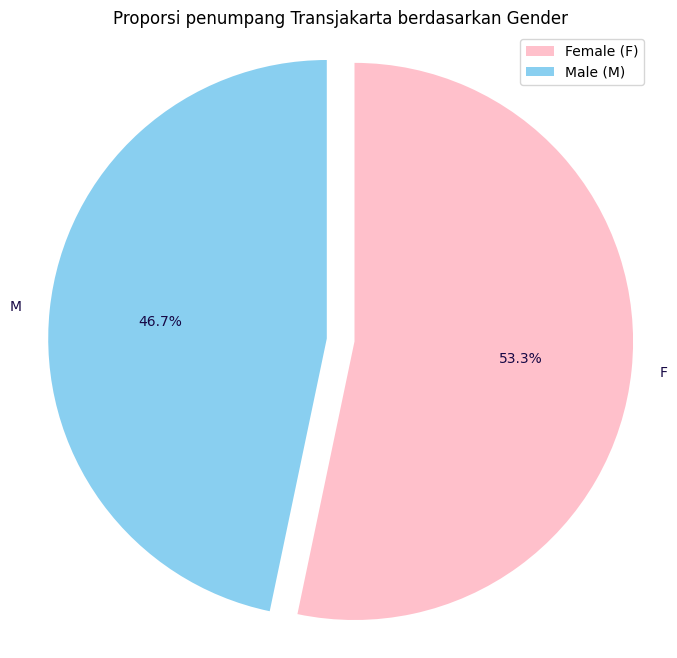

In [38]:
plt.figure(figsize=(8,8))
plt.pie(gender_counts['count'],
        labels=gender_counts['payCardSex'],
        autopct='%.1f%%',
        colors=['#FFC0CB', '#89CFF0'],
        startangle=90,
        counterclock=False,
        explode=[0.1,0],
        textprops={'color':'#170845'})
plt.axis('equal')
plt.legend(['Female (F)', 'Male (M)'], loc='upper right')
plt.title('Proporsi penumpang Transjakarta berdasarkan Gender')
plt.show()

Berdasarkan diagram lingkaran di atas, terlihat distribusi jumlah penumpang Transjakarta berdasarkan gender. Data ini diambil dari kolom `payCardSex`.

Analisis menunjukkan bahwa proporsi penumpang wanita lebih tinggi sekitar 6.6% dibandingkan penumpang pria. Meskipun perbedaan ini tidak terlalu signifikan, kebijakan khusus untuk menyediakan armada khusus wanita tampaknya dapat dilakukan, mengingat dominasi penumpang wanita. Kebijakan ini bertujuan untuk memberikan rasa aman terkait kejahatan seksual yang sering terjadi di area operasional Transjakarta.

**Koridor yang sering digunakan oleh penumpang perempuan**

In [39]:
female_df= df[df['payCardSex'] == 'F']

,corridorName,count
0,Poris Plawad - Bundaran Senayan,211
1,Pasar Minggu - Tanah Abang,210
2,Rusun Rawa Bebek - Kodamar,205
3,Terminal Tanah Merah - Pulo Gadung,195
4,Cilangkap - Cililitan,187


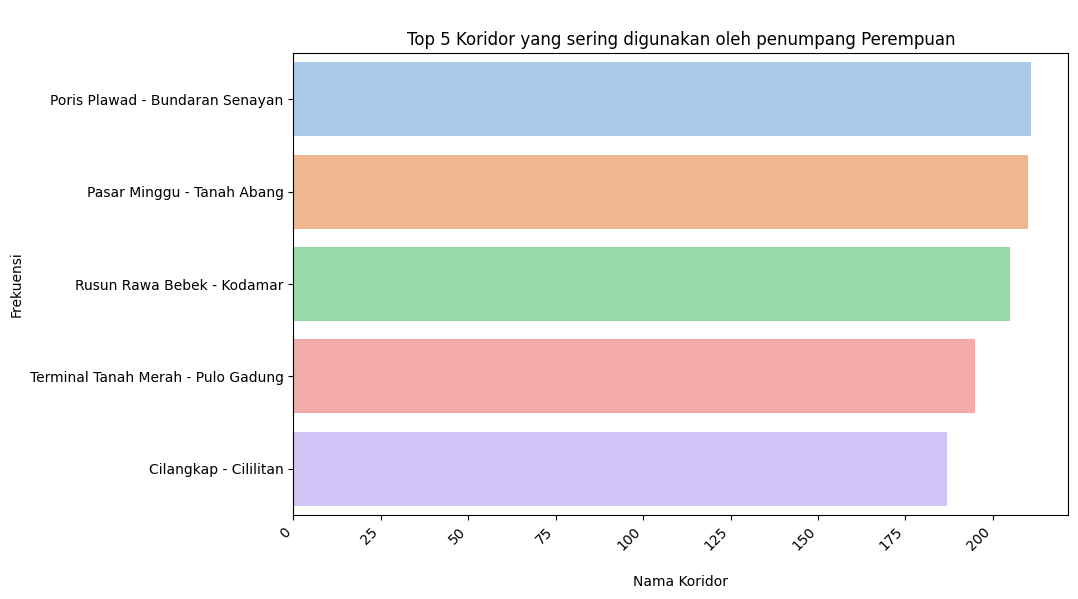

In [40]:
corridor_female_df = female_df['corridorName'].value_counts().reset_index()
corridor_female_df = corridor_female_df.sort_values(by='count', ascending=False).head(5)
display (corridor_female_df)

#-----------------------------------------------------------------------------------------------------------------------------------------#

plt.figure(figsize=(10, 6))
sns.barplot(x='count', y='corridorName', data=corridor_female_df , palette='pastel')  

plt.xlabel('\nNama Koridor')
plt.ylabel('Frekuensi')
plt.title('\nTop 5 Koridor yang sering digunakan oleh penumpang Perempuan')

plt.xticks(rotation=45, ha='right')
plt.show()

Berdasarkan bar chart, terlihat koridor yang sering digunakan oleh penumpang perempuan adalah 
- (Poris Plawad - Bundaran Senayan) 
- (Pasar Minggu - Tanah Abang)
- (Rusun Rawa Bebek - Kodamar) 
- (Terminal Tanah Merah - Pulo Gadung)
- (Cilangkap - Cililitan)



Saat ini, fasilitas bus pink atau bus khusus perempuan dioperasikan di lima koridor, yaitu 
- Koridor 2 (Pulo Gadung-Harmoni), 
- Koridor 3 (Kalideres-Pasar Baru), 
- Koridor 9 (Pinang Ranti-Pluit), 
- Koridor 13 (Ciledug-Tendean), 
- Koridor 5C (PGC-Harmoni) .

Sumber: https://www.majalahlintas.com/bus-transjakarta-pink-simbol-perlindungan-kepada-perempuan/

JIka kita perhatikan, sebagian besar koridor yang jumlah penumpang perempuannya tinggi belum mendapatkan akses/pelayanan bus pink. Ini artinya program Bus Pink belum tepat sasaran.
Hal ini bisa menjadi bahan pertimbangan untuk menentukan prioritas koridor mana yang perlu mendapatkan perhatian lebih lanjut. Langkah ini sejalan dengan upaya menciptakan lingkungan transportasi yang lebih mendukung keamanan perempuan.


##  **2. Pola Perjalanan penumpang Transjakarta**

In [41]:
weekday_df = df[(df['tapInDay'] != 'Saturday') & (df['tapInDay'] != 'Sunday')]
display(weekday_df)

,transID,payCardID,payCardBank,payCardName,payCardSex,payCardBirthDate,corridorID,corridorName,direction,tapInStops,...,tapOutStopsLat,tapOutStopsLon,stopEndSeq,tapOutTime,payAmount,transType,tapInHour,tapOutHour,tapInDay,day_group
0,EIIW227B8L34VB,180062659848800,emoney,Bajragin Usada,M,2008,5,Matraman Baru - Ancol,1.0,P00142,...,-6.203101,106.85715,12.0,2023-04-03 06:00:53,3500.0,Busway,5,6,Monday,Weekdays
1,LGXO740D2N47GZ,4885331907664776,dki,Gandi Widodo,F,1997,6C,Stasiun Tebet - Karet via Patra Kuningan,0.0,B01963P,...,-6.217152,106.81892,21.0,2023-04-03 06:40:01,3500.0,Busway,5,6,Monday,Weekdays
2,DJWR385V2U57TO,4996225095064169,dki,Emong Wastuti,F,1992,R1A,Pantai Maju - Kota,0.0,B00499P,...,-6.133731,106.81475,39.0,2023-04-03 06:50:55,3500.0,Busway,5,6,Monday,Weekdays
3,JTUZ800U7C86EH,639099174703,flazz,Surya Wacana,F,1978,11D,Pulo Gebang - Pulo Gadung 2 via PIK,0.0,B05587P,...,-6.183068,106.93194,29.0,2023-04-03 06:28:16,3500.0,Busway,5,6,Monday,Weekdays
4,VMLO535V7F95NJ,570928206772,flazz,Embuh Mardhiyah,M,1982,12,Tanjung Priok - Pluit,0.0,P00239,...,-6.135355,106.81143,15.0,2023-04-03 06:57:03,3500.0,Busway,6,6,Monday,Weekdays
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
37894,ZXVG342K6T27GU,4475487986105118550,brizzi,"Tgk. Dipa Purnawati, S.E.I",F,2012,JAK.39,Kalimalang - Duren Sawit,0.0,B04489P,...,-6.244759,106.94249,34.0,2023-04-14 13:15:25,0.0,Mikrotrans,11,13,Friday,Weekdays
37895,ZWEC949B8Q87QG,4685818286724028395,brizzi,Kamila Mahendra,F,2004,6B,Ragunan - MH Thamrin via Semanggi,1.0,P00261,...,-6.290967,106.82365,12.0,2023-04-21 19:55:49,3500.0,Busway,18,19,Friday,Weekdays
37896,YHHK837P6Y95GN,6502902290603767,dki,Titi Siregar,M,1974,9N,Pinang Ranti - Pramuka,1.0,P00064,...,-6.291075,106.88634,16.0,2023-04-18 22:28:22,3500.0,Busway,21,22,Tuesday,Weekdays
37897,YXPP627N4G95HO,213159426675861,emoney,drg. Zahra Nashiruddin,F,1976,1T,Cibubur - Balai Kota,1.0,B02873P,...,-6.370321,106.89628,14.0,2023-04-04 13:27:25,20000.0,RoyalTrans,10,13,Tuesday,Weekdays


### **Peak Hour WEEKDAYS**

Menampilkan data jam tapIn

In [42]:
print(weekday_df.groupby('tapInHour').size().reset_index(name='Jumlah'))
plt.show()

    tapInHour  Jumlah
0           5    2858
1           6    5125
2           7    2356
3           8    2424
4           9    2382
5          10      95
6          11     130
7          12     110
8          13     119
9          14       8
10         15     140
11         16    2853
12         17    4778
13         18    2014
14         19    2014
15         20    1976
16         21    1811


Menampilkan data Jam Tap-Out

In [43]:
print(weekday_df.groupby('tapOutHour').size().reset_index(name='Jumlah'))
plt.show()

    tapOutHour  Jumlah
0            0       1
1            5     913
2            6    3131
3            7    3470
4            8    2429
5            9    2385
6           10    2108
7           11     786
8           12     125
9           13     113
10          14      92
11          15      50
12          16     107
13          17    1748
14          18    3923
15          19    3191
16          20    2014
17          21    1978
18          22    1847
19          23     782


**Visualisasi Lineplot**

Visualisasi untuk melihat disribusi jam tapIn dan tapOut selama WEEKDAYS

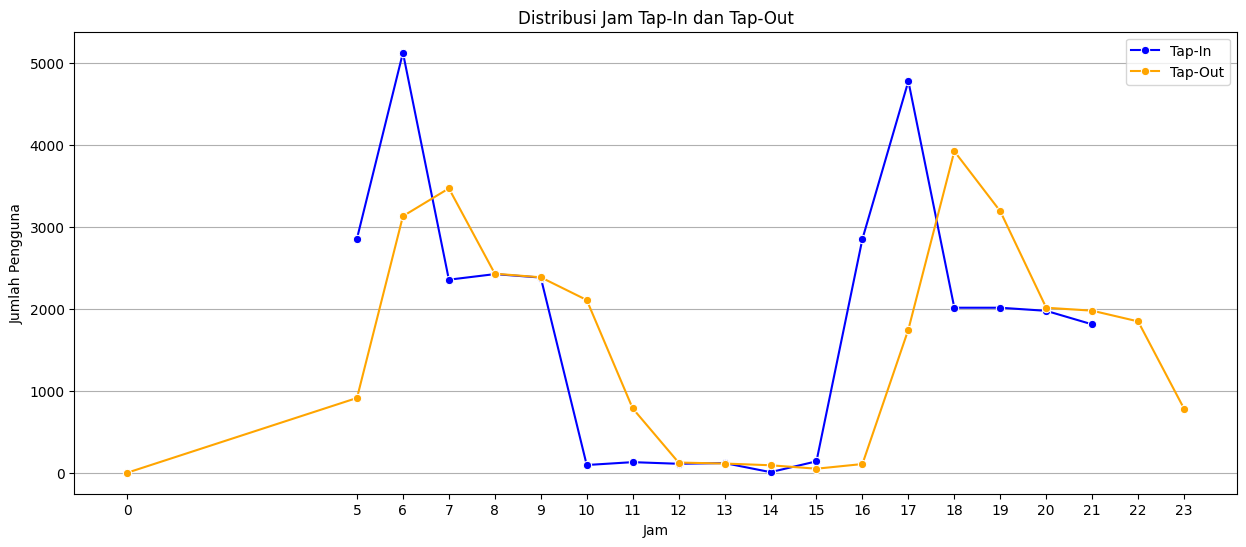

In [44]:
plt.figure(figsize=(15, 6))

tapin_count = weekday_df['tapInHour'].value_counts().sort_index()
sns.lineplot(x=tapin_count.index, y=tapin_count.values, color='blue', marker='o', label='Tap-In')

tapout_count = weekday_df['tapOutHour'].value_counts().sort_index()
sns.lineplot(x=tapout_count.index, y=tapout_count.values, color='orange', marker='o', label='Tap-Out')

plt.title('Distribusi Jam Tap-In dan Tap-Out')
plt.xlabel('Jam')
plt.ylabel('Jumlah Pengguna')
plt.legend()
plt.grid(axis='y')

plt.xticks(tapout_count.index)

plt.show()

Berdasarkan grafik di atas,  kita dapat mengkategorikan puncak aktivitas tapIn dan tapOut penggunaan Transjakarta ke dalam dua kategori:
    
- Pada waktu pagi, puncak aktivitas terjadi antara jam 5 pagi hingga 9 pagi untuk tapIn, dengan puncak tertinggi pada jam 6 (>5000 penumpang). Sedangkan puncak aktivitas terjadi antara jam 6 pagi hingga 10 pagi untuk tapOut, dengan puncak tertinggi pada jam 7 (> 3400 penumpang).

- Pada waktu sore, puncak aktivitas terjadi antara jam 16 sore hingga 20 malam, dengan puncak tertinggi pada jam 17 untuk tapIn (> 4700 penumpang). Sedangkan puncak aktivitas terjadi antara jam 17 sore hingga 22 malam untuk tapOut, dengan puncak tertinggi pada jam 18 sore. (> 3900 penumpang)

> ### WEEKDAYS

- Setelah memahami kapan dan pada jam berapa puncak aktivitas penggunaan Transjakarta, langkah berikutnya adalah menganalisis koridor dan halte mana yang sering diakses selama periode sibuk, terutama di pagi dan sore hari.

- Dengan pemahaman yang lebih mendalam tentang koridor dan halte yang ramai pada jam-jam sibuk ini, kita bisa mengidentifikasi pola perjalanan penumpang dengan lebih akurat. Informasi ini tidak hanya berguna untuk evaluasi optimalisasi armada, tetapi juga sebagai dasar strategis untuk mengatasi kepadatan penumpang di berbagai titik layanan Transjakarta. Beberapa pertimbangan evaluasi yang dapat diterapkan meliputi:

    - Mengidentifikasi koridor terpadat selama jam sibuk untuk melakukan efisiensi armada dengan cara mendistribusi armada dari koridor yang kurang padat ke koridor yang lebih ramai.

    - Merenovasi halte-halte yang mungkin mengalami kepadatan tinggi, sehingga penumpang dapat menunggu bus dengan lebih nyaman dan tidak berdesakan.

- Informasi ini menjadi insight yang sangat penting untuk meningkatkan efisiensi operasional dan memberikan journey experience yang lebih baik bagi pengguna layanan Transjakarta. Dengan demikian, analisis pola perjalanan pada jam sibuk bukan hanya tentang memahami kebiasaan pengguna, tetapi juga melihat langkah konkret yang tepat untuk meningkatkan kualitas layanan transportasi umum di Jakarta.

In [45]:
def peak_hour_time(cols):
    if 5 <= cols <= 9:
        return 'Peak hour pagi'
    elif 16 <= cols <= 21:
        return 'Peak hour sore'
    else:
        return 'off peak hour'

df['weekday_df'] = df['tapInHour'].apply(peak_hour_time)

In [65]:
# Melihat Koridor yang tidak terlalu sibuk pada jam sibuk (PEAK HOUR)
off_peak_hour_pagi_bykoridor = df[df['weekday_df'] == "Peak hour pagi"].groupby(['corridorName']).size().reset_index(name='Count')
off_peak_hour_pagi_bykoridor = off_peak_hour_pagi_bykoridor.sort_values(by='Count', ascending=True).head(5)
display(off_peak_hour_pagi_bykoridor)

# UNTUK MENJADI ALTERNATIF ARMADA TAMBAHAN KORIDOR SIBUK DI PEAK HOUR


,corridorName,Count
67,Kampung Rambutan - Blok M,4
192,Tanah Abang - Kebayoran Lama via Pos Pengumben,7
172,Senen - Tanah Abang,7
205,Term. Pulo Gadung - Lampiri,9
42,Grogol - Pos Pengumben via Slipi,10


#### **KORIDOR paling padat selama jam sibuk (peak hour)**

> **KORIDOR - Peak Hour PAGI (5:00 - 9:00)**

,corridorName,Count
21,Cibubur - Balai Kota,187
33,Ciputat - CSW,180
47,Harmoni - Jakarta International Stadium,158
157,Rusun Pondok Bambu - Walikota Jakarta Timur,157
73,Kampung Rambutan - Pondok Gede,156


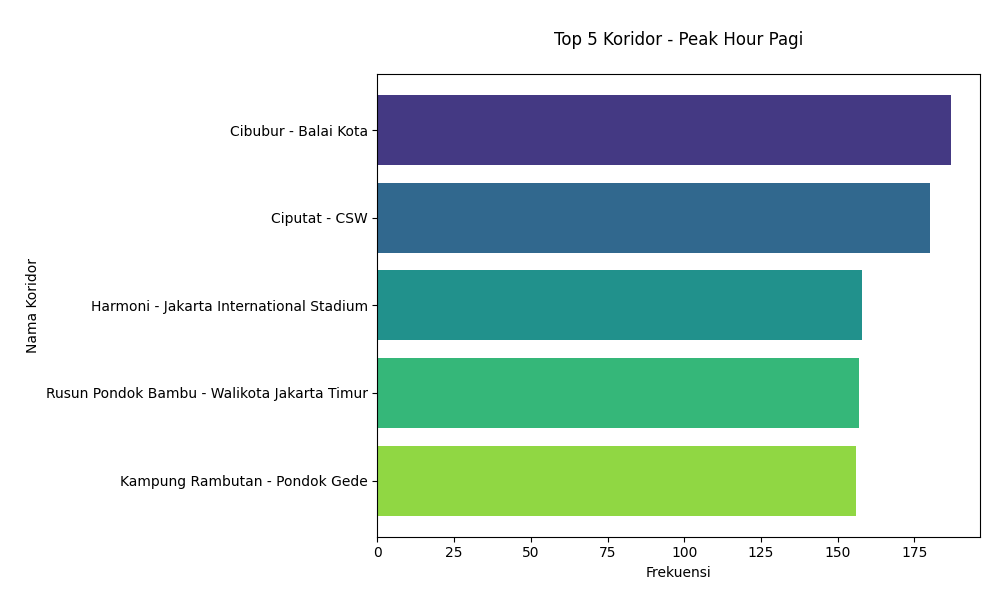

In [47]:
peak_hour_pagi_bykoridor = df[df['weekday_df'] == "Peak hour pagi"].groupby(['corridorName']).size().reset_index(name='Count')
peak_hour_pagi_bykoridor = peak_hour_pagi_bykoridor.sort_values(by='Count', ascending=False).head(5)
peak_hour_pagi_bykoridor
display (peak_hour_pagi_bykoridor)


#-----------------------------------------------------------------------------------------------------------------------------------------#



# Plot horizontal bar chart for top 5 corridors during peak hour pagi
plt.figure(figsize=(10, 6))
custom_colors = sns.color_palette("viridis", len(peak_hour_pagi_bykoridor))
bars = plt.barh(peak_hour_pagi_bykoridor['corridorName'], peak_hour_pagi_bykoridor['Count'], color=custom_colors)

plt.title('\nTop 5 Koridor - Peak Hour Pagi\n')
plt.xlabel('Frekuensi')
plt.ylabel('\nNama Koridor')

plt.gca().invert_yaxis()  # To display the highest count at the top
plt.tight_layout()
plt.show()

# For bar vertical :
# plt.figure(figsize=(10,6))
# custom_colors = sns.color_palette("viridis", len(peak_hour_pagi_bykoridor))
# bars = plt.bar(peak_hour_pagi_bykoridor['corridorName'], peak_hour_pagi_bykoridor['Count'], color=custom_colors)

# plt.title( '\n Top 5 Koridor - Peak Hour Pagi\n')
# plt.xlabel('\nNama Koridor')
# plt.ylabel('Frekuensi')
# plt.xticks(rotation=45, ha='right')  
# plt.tight_layout() 
# plt.show()

**KORIDOR - Peak Hour SORE (16:00 - 21:00)**

,corridorName,Count
21,Cibubur - Balai Kota,183
33,Ciputat - CSW,176
73,Kampung Rambutan - Pondok Gede,162
47,Harmoni - Jakarta International Stadium,162
116,Pulo Gadung - Monas,160


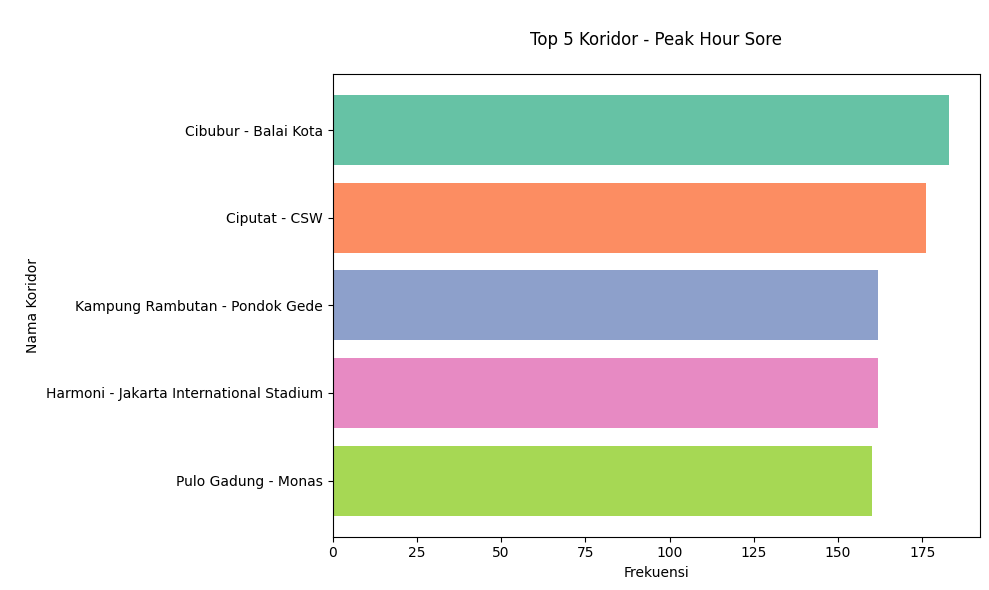

In [48]:
peak_hour_sore_bykoridor= df[df['weekday_df'] == "Peak hour sore"].groupby(['corridorName']).size().reset_index(name='Count')
peak_hour_sore_bykoridor= peak_hour_sore_bykoridor.sort_values(by='Count', ascending=False).head(5)
peak_hour_sore_bykoridor
display(peak_hour_sore_bykoridor)



#-----------------------------------------------------------------------------------------------------------------------------------------#

# Plot horizontal bar chart for top 5 corridors during peak hour sore
plt.figure(figsize=(10, 6))
custom_colors = sns.color_palette("Set2", len(peak_hour_sore_bykoridor))
bars = plt.barh(peak_hour_sore_bykoridor['corridorName'], peak_hour_sore_bykoridor['Count'], color=custom_colors)

plt.title('\nTop 5 Koridor - Peak Hour Sore\n')
plt.xlabel('Frekuensi')
plt.ylabel('\nNama Koridor')

plt.gca().invert_yaxis()  # To display the highest count at the top
plt.tight_layout()
plt.show()

# For Vertical Bar
# plt.figure(figsize=(10,6))
# custom_colors = sns.color_palette("Set2", len(peak_hour_sore_bykoridor))
# bars = plt.bar(peak_hour_sore_bykoridor['corridorName'], peak_hour_sore_bykoridor['Count'], color=custom_colors)

# plt.title('\n Top 5 Koridor - Peak Hour Sore \n')
# plt.xlabel('\n Nama Koridor')
# plt.ylabel('Frekuensi')
# plt.xticks(rotation=45, ha='right') 
# plt.tight_layout() 
# plt.show()


- Berdasarkan grafik barchart di atas, kita dapat melihat koridor mana saja yang memiliki kepadatan penumpang tertinggi selama jam sibuk. Koridor Cibubur - Balai Kota menunjukkan jumlah perjalanan tertinggi selama jam sibuk pagi dan sore, menandakan banyak pengguna yang melakukan perjalanan menggunakan koridor ini.

- Beberapa Koridor lain juga menunjukkan jumlah perjalanan yang signifikan selama jam sibuk, baik pagi maupun sore. Ini menunjukkan bahwa koridor ini juga sangat sering digunakan oleh penumpang pada jam-jam sibuk.
    - Koridor Ciputat - CSW
    - Pulo Gadung - Monas 
    - Harmoni - Jakarta International Stadium, dan 
    - Kampung Rambutan - Pondok Gede 


- Ini mengindikasikan bahwa banyak orang memulai perjalanan mereka ke tempat kerja atau tujuan lainnya di pagi hari dari koridor-koridor ini.


- Dapat disimpulkan bahwa koridor-koridor yang tertera membutuhkan perhatian khusus untuk optimalisasi dan efisiensi armada, seperti misalnya PT. Transjakarta dapat mempertimbangkan menambah armada sesuai dengan kebutuhan, meningkatkan kapasitas, dan waktu sibuk di halte-halte tersebut.

- Juga dapat dijadikan alternatif yaitu dengan merelokasi armada dari rute yang tidak terlalu ramai pada saat peak hour ke koridor yang ramai.


#### **HALTE paling padat selama jam sibuk (peak hour)**

> **MAP**

In [62]:
import folium
from folium.plugins import MarkerCluster
from IPython.display import display

#UNTUK MAP VISUALISATION 

def visualize_peak_hours(peak_hour_data, lat_col, lon_col, name_col, title):
    # Initialize the map centered around Jakarta
    map_center = [df[lat_col].mean(), df[lon_col].mean()]
    map_jakarta = folium.Map(location=map_center, zoom_start=12)

    # Add a marker cluster to handle overlapping points
    marker_cluster = MarkerCluster().add_to(map_jakarta)

    # Add markers to the map
    for idx, row in peak_hour_data.iterrows():
        folium.Marker(
            location=[row[lat_col], row[lon_col]],
            popup=f"{row[name_col]}: {row['Count']}",
            icon=folium.Icon(color='blue', icon='info-sign')
        ).add_to(marker_cluster)

    # Add title to the map
    folium.map.Marker(
        map_center,
        icon=folium.DivIcon(
            icon_size=(150,36),
            icon_anchor=(0,0),
            html=f'<div style="font-size: 24pt">{title}</div>',
        )
    ).add_to(map_jakarta)
    
    return map_jakarta

# Function to extract relevant columns and create map for tap-in and tap-out stops
def create_peak_hour_maps(df):
    # Peak hour morning Tap-in
    peak_hour_pagiTapIn = df[df['weekday_df'] == "Peak hour pagi"].groupby(['tapInStops', 'tapInStopsName', 'tapInStopsLat', 'tapInStopsLon']).size().reset_index(name='Count')
    peak_hour_pagiTapIn = peak_hour_pagiTapIn.sort_values(by='Count', ascending=False).head(5)
    map_pagiTapIn = visualize_peak_hours(peak_hour_pagiTapIn, 'tapInStopsLat', 'tapInStopsLon', 'tapInStopsName', 'Morning Peak Hour Tap-in Stops')

    # Peak hour evening Tap-in
    peak_hour_soreTapIn = df[df['weekday_df'] == "Peak hour sore"].groupby(['tapInStops', 'tapInStopsName', 'tapInStopsLat', 'tapInStopsLon']).size().reset_index(name='Count')
    peak_hour_soreTapIn = peak_hour_soreTapIn.sort_values(by='Count', ascending=False).head(5)
    map_soreTapIn = visualize_peak_hours(peak_hour_soreTapIn, 'tapInStopsLat', 'tapInStopsLon', 'tapInStopsName', 'Evening Peak Hour Tap-in Stops')

    # Peak hour morning Tap-out
    peak_hour_pagiTapOut = df[df['weekday_df'] == "Peak hour pagi"].groupby(['tapOutStops', 'tapOutStopsName', 'tapOutStopsLat', 'tapOutStopsLon']).size().reset_index(name='Count')
    peak_hour_pagiTapOut = peak_hour_pagiTapOut.sort_values(by='Count', ascending=False).head(5)
    map_pagiTapOut = visualize_peak_hours(peak_hour_pagiTapOut, 'tapOutStopsLat', 'tapOutStopsLon', 'tapOutStopsName', 'Morning Peak Hour Tap-out Stops')

    # Peak hour evening Tap-out
    peak_hour_soreTapOut = df[df['weekday_df'] == "Peak hour sore"].groupby(['tapOutStops', 'tapOutStopsName', 'tapOutStopsLat', 'tapOutStopsLon']).size().reset_index(name='Count')
    peak_hour_soreTapOut = peak_hour_soreTapOut.sort_values(by='Count', ascending=False).head(5)
    map_soreTapOut = visualize_peak_hours(peak_hour_soreTapOut, 'tapOutStopsLat', 'tapOutStopsLon', 'tapOutStopsName', 'Evening Peak Hour Tap-out Stops')

    return map_pagiTapIn, map_soreTapIn, map_pagiTapOut, map_soreTapOut

# Generate maps
map_pagiTapIn, map_soreTapIn, map_pagiTapOut, map_soreTapOut = create_peak_hour_maps(df)

# Display maps inline in Jupyter Notebook
# display(map_pagiTapIn)
# display(map_soreTapIn)
# display(map_pagiTapOut)
# display(map_soreTapOut)

> **HALTE / TAP-IN - Peak hour PAGI (5:00 - 9:00)**

,tapInStops,tapInStopsName,Count
1132,P00064,Garuda Taman Mini,131
582,B03277P,Rusun Kapuk Muara,97
1207,P00170,Penjaringan,84
1231,P00202,Rawa Selatan,78
1269,P00254,Tendean,78


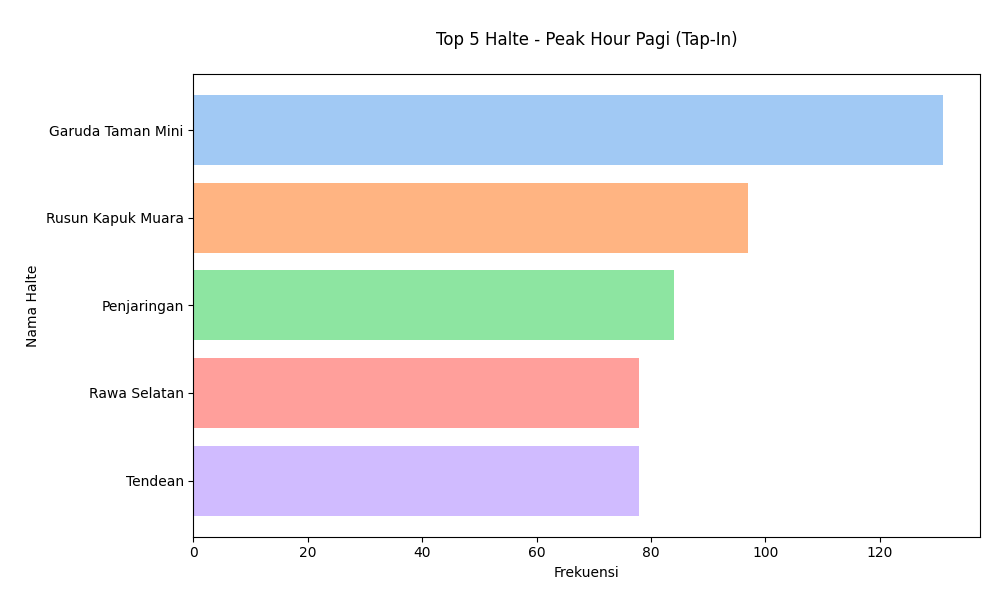

In [61]:
peak_hour_pagiTapIn = df[df['weekday_df'] == "Peak hour pagi"].groupby(['tapInStops', 'tapInStopsName']).size().reset_index(name='Count')
peak_hour_pagiTapIn = peak_hour_pagiTapIn.sort_values(by='Count', ascending=False).head(5)
display (peak_hour_pagiTapIn)

#-----------------------------------------------------------------------------------------------------------------------------------------#

# Plot horizontal bar chart for top 5 halte during peak hour pagi (tap-in)
plt.figure(figsize=(10, 6))
custom_colors = sns.color_palette("pastel", len(peak_hour_pagiTapIn))
bars = plt.barh(peak_hour_pagiTapIn['tapInStopsName'], peak_hour_pagiTapIn['Count'], color=custom_colors)

plt.title('\nTop 5 Halte - Peak Hour Pagi (Tap-In)\n')
plt.xlabel('Frekuensi')
plt.ylabel('\nNama Halte')

plt.gca().invert_yaxis()  # To display the highest count at the top
plt.tight_layout()
plt.show()


display(map_pagiTapIn) # Display in map



**HALTE / TAP-IN - Peak hour SORE (16:00 - 21:00)**

,tapInStops,tapInStopsName,Count
1266,P00170,Penjaringan,132
63,B00248P,Cibubur Junction,95
1261,P00164,Pejaten,95
1146,P00016,BKN,93
1350,P00297,BNN LRT,78


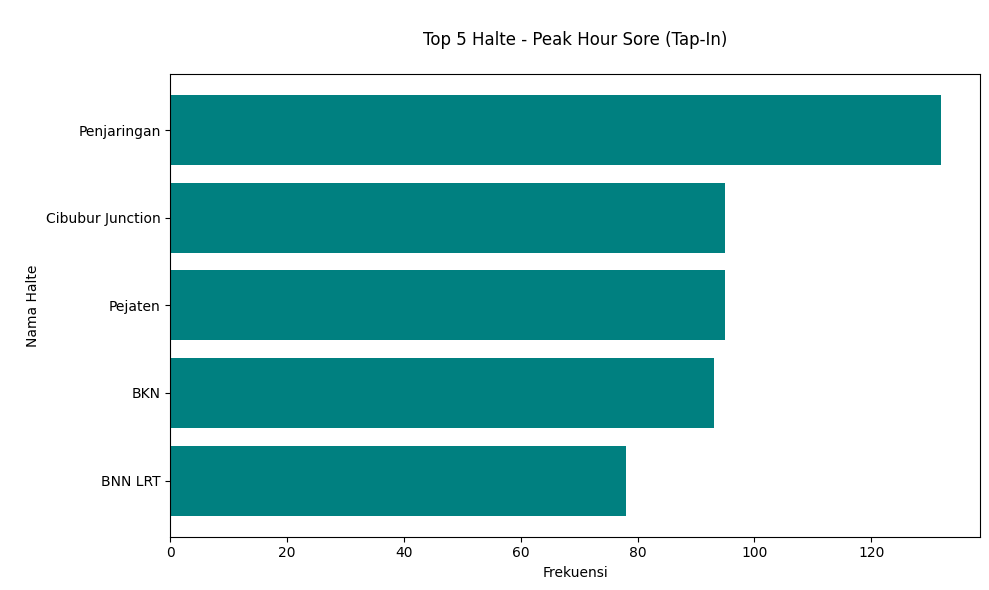

In [60]:
peak_hour_soreTapIn = df[df['weekday_df'] == "Peak hour sore"].groupby(['tapInStops', 'tapInStopsName']).size().reset_index(name='Count')
peak_hour_soreTapIn = peak_hour_soreTapIn.sort_values(by='Count', ascending=False).head(5)
display (peak_hour_soreTapIn)


#-----------------------------------------------------------------------------------------------------------------------------------------#

peak_hour_soreTapIn_sorted = peak_hour_soreTapIn.sort_values(by='Count', ascending=False).head(5)

plt.figure(figsize=(10, 6))
plt.barh(peak_hour_soreTapIn_sorted['tapInStopsName'], peak_hour_soreTapIn_sorted['Count'], color='teal')

plt.title('\nTop 5 Halte - Peak Hour Sore (Tap-In)\n')
plt.xlabel('Frekuensi')
plt.ylabel('\nNama Halte')

plt.gca().invert_yaxis()  # To display the highest count at the top
plt.tight_layout()
plt.show()

display(map_soreTapIn) #To Display in Map




- Berdasarkan grafik di atas, Halte Garuda Taman Mini merupakan halte terpadat pada jam sibuk pagi hari (Dapat dilihat dari jumlah Tap-In), sedangkan halte Penjaringan menjadi yang terpadat pada jam sibuk sore hari.

- Identifikasi halte-halte yang banyak digunakan selama waktu sibuk dapat memberikan informasi bagi PT. Transjakarta dalam mengatasi masalah kepadatan penumpang di halte-halte padat selama jam sibuk. Dengan mengetahui halte mana yang padat, maka upaya revitalisasi Transjakarta akan lebih tepat sasaran.

**HALTE / TAP-OUT - Peak hour PAGI (5:00 - 9:00)**

,tapOutStops,tapOutStopsName,Count
1093,P00170,Penjaringan,162
990,P00016,BKN,150
1069,P00137,Monas,126
1056,P00112,Kejaksaan Agung,98
1087,P00161,Pecenongan,95


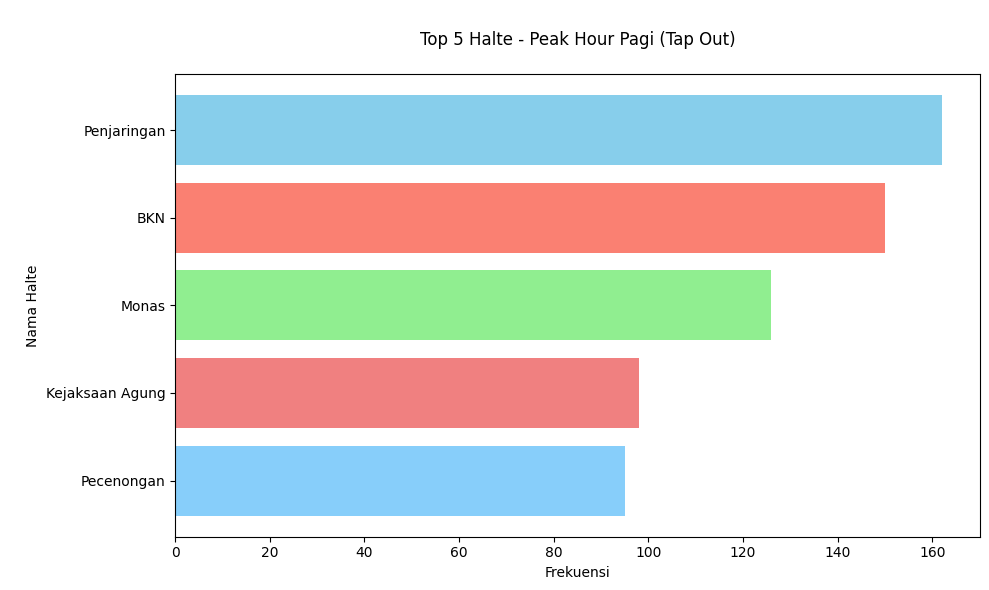

In [63]:
peak_hour_pagiTapOut = df[df['weekday_df'] == "Peak hour pagi"].groupby(['tapOutStops', 'tapOutStopsName']).size().reset_index(name='Count')
peak_hour_pagiTapOut = peak_hour_pagiTapOut.sort_values(by='Count', ascending=False).head(5)
display(peak_hour_pagiTapOut)

#-----------------------------------------------------------------------------------------------------------------------------------------#

colors = ['skyblue', 'salmon', 'lightgreen', 'lightcoral', 'lightskyblue']
plt.figure(figsize=(10, 6))
bars = plt.barh(peak_hour_pagiTapOut['tapOutStopsName'], peak_hour_pagiTapOut['Count'], color=colors)

plt.title('\nTop 5 Halte - Peak Hour Pagi (Tap Out)\n')
plt.xlabel('Frekuensi')
plt.ylabel('\nNama Halte')

plt.gca().invert_yaxis()  # To display the highest count at the top
plt.tight_layout()
plt.show()

display(map_pagiTapOut) #To Display in Map


Di sini bisa dilihat sebagian besar tap-out paling ramai di peak hour di pagi hari adalah di area perkantoran.

**HALTE / TAP-OUT - Peak hour SORE (16:00 - 21:00)**

,tapOutStops,tapOutStopsName,Count
888,B05725P,Term. Senen,148
1055,P00016,BKN,136
1168,P00179,Pinang Ranti,116
879,B05708P,Term. Kampung Rambutan,98
545,B03277P,Rusun Kapuk Muara,91


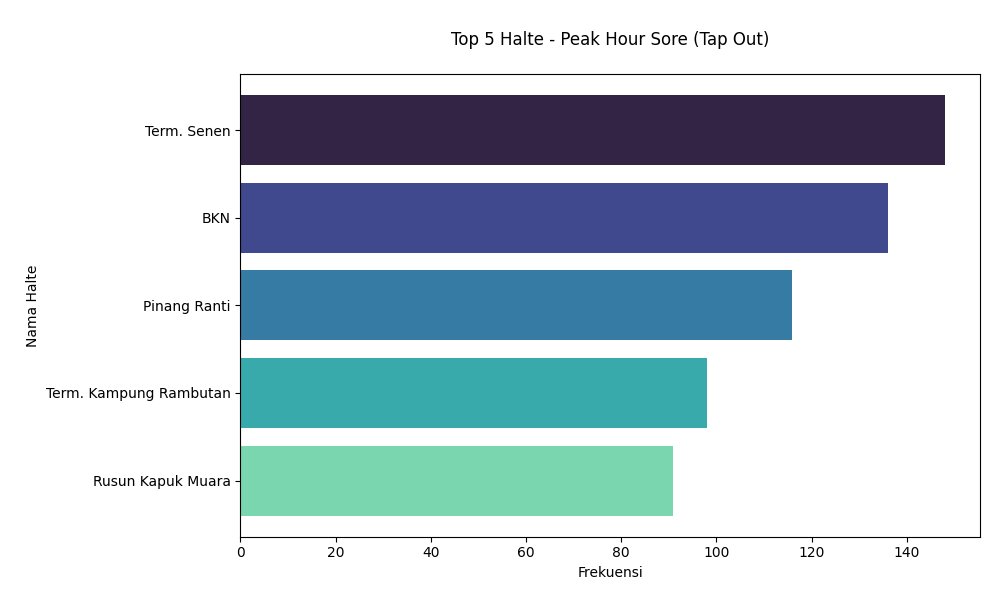

In [64]:
peak_hour_soreTapOut = df[df['weekday_df'] == "Peak hour sore"].groupby(['tapOutStops', 'tapOutStopsName']).size().reset_index(name='Count')
peak_hour_soreTapOut = peak_hour_soreTapOut.sort_values(by='Count', ascending=False).head(5)
display(peak_hour_soreTapOut)

#-----------------------------------------------------------------------------------------------------------------------------------------#

# Plot horizontal bar chart for top 5 halte during peak hour sore (tap-out)
plt.figure(figsize=(10, 6))
custom_colors = sns.color_palette("mako", len(peak_hour_soreTapOut))
bars = plt.barh(peak_hour_soreTapOut['tapOutStopsName'], peak_hour_soreTapOut['Count'], color=custom_colors)

plt.title('\nTop 5 Halte - Peak Hour Sore (Tap Out)\n')
plt.xlabel('Frekuensi')
plt.ylabel('\nNama Halte')

plt.gca().invert_yaxis()  # To display the highest count at the top
plt.tight_layout()
plt.show()


display(map_soreTapOut) #To Display in Map

- Berdasarkan grafik di atas, Halte Penjaringan merupakan halte terpadat pada jam sibuk pagi hari (Dapat dilihat dari jumlah Tap-In), sedangkan halte Term. Senen menjadi yang terpadat pada jam sibuk sore hari.

- Identifikasi halte-halte yang banyak digunakan selama waktu sibuk dapat memberikan informasi bagi PT. Transjakarta dalam mengatasi masalah kepadatan penumpang di halte-halte padat selama jam sibuk. Dengan mengetahui halte mana yang padat, maka upaya revitalisasi Transjakarta akan lebih tepat sasaran.

### **Peak Hour WEEKEND**

In [54]:
weekend_df = df[df['tapInDay'].isin(['Saturday', 'Sunday'])]

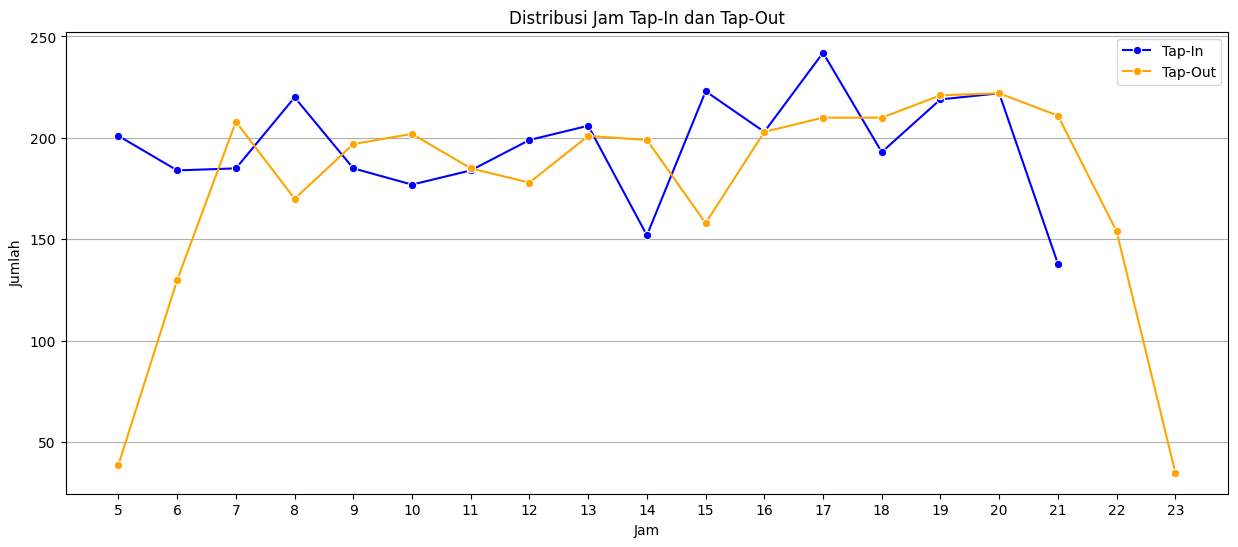

In [55]:
plt.figure(figsize=(15, 6))

tapin_count = weekend_df['tapInHour'].value_counts().sort_index()
sns.lineplot(x=tapin_count.index, y=tapin_count.values, color='blue', marker='o', label='Tap-In')

tapout_count = weekend_df['tapOutHour'].value_counts().sort_index()
sns.lineplot(x=tapout_count.index, y=tapout_count.values, color='orange', marker='o', label='Tap-Out')

plt.title('Distribusi Jam Tap-In dan Tap-Out')
plt.xlabel('Jam')
plt.ylabel('Jumlah')
plt.legend()
plt.grid(axis='y')

plt.xticks(tapout_count.index)

plt.show()

Berdasarkan lineplot di atas, dapat diketahui bahwa:

- Jam sibuk tap-in penggunaan halte pada akhir pekan memiliki persebaran yang relatif merata dan tidak terlalu padat jika dibanding kan dengan WEEKDAYS, yaitu antara pukul 5 pagi hingga 8 malam. Pada pukul 2 siang dan 9 malam, jumlah penumpang cenderung jauh lebih rendah, menunjukkan waktu yang kurang sibuk.

- Jam sibuk tap-out penggunaan halte pada akhir pekan memiliki persebaran yang relatif merata antara pukul 7 pagi hingga 9 malam. Pada pukul 5 pagi dan 11 malam, jumlah penumpang cenderung lebih rendah, menunjukkan waktu yang kurang sibuk.

#### **Koridor yang sering digunakan pada akhir pekan**

,corridorID,corridorName,Count
140,JAK.19,Pinang Ranti - Kampung Rambutan,31
100,9C,Pinang Ranti - Bundaran Senayan,30
133,JAK.120,JIS - Terminal Muara Angke,29
43,2B,Harapan Indah - ASMI,28
179,JAK.58,Cilincing - Rorotan,26


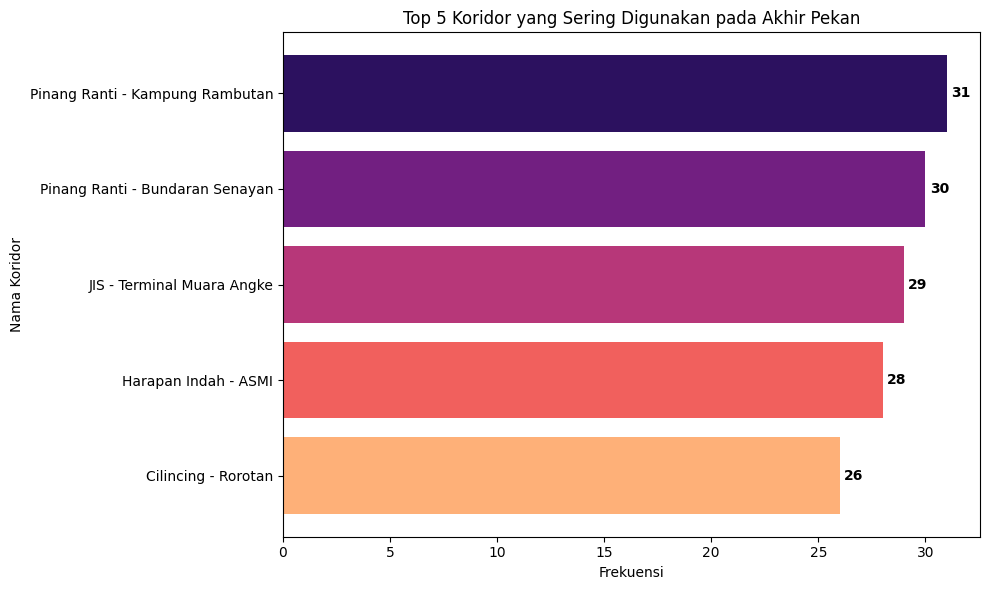

In [56]:
weekend_corridor = df[(df['tapInDay'] == "Saturday") + (df['tapInDay'] == "Sunday")].groupby(['corridorID', 'corridorName']).size().reset_index(name='Count')
weekend_corridor_sorted = weekend_corridor.sort_values(by='Count', ascending=False).head(5)
display(weekend_corridor_sorted)



#-----------------------------------------------------------------------------------------------------------------------------------------#


plt.figure(figsize=(10, 6))
custom_colors = sns.color_palette("magma", len(weekend_corridor_sorted))
bars = plt.barh(weekend_corridor_sorted['corridorName'], weekend_corridor_sorted['Count'], color=custom_colors)

plt.title('Top 5 Koridor yang Sering Digunakan pada Akhir Pekan')
plt.xlabel('Frekuensi')
plt.ylabel('Nama Koridor')

# Adding the data labels
for bar in bars:
    xval = bar.get_width()
    plt.text(xval + 0.2, bar.get_y() + bar.get_height() / 2, round(xval, 1), ha='left', va='center', color='black', fontweight='bold')

plt.gca().invert_yaxis()  # To display the highest count at the top
plt.tight_layout()
plt.show()



# For Vertical Bar
# plt.figure(figsize=(10, 6))
# custom_colors = sns.color_palette("magma", len(weekend_corridor_sorted))
# bars = plt.bar(weekend_corridor_sorted['corridorName'], weekend_corridor_sorted['Count'], color=custom_colors)

# plt.title('Top 5 Koridor yang Sering Digunakan pada Akhir Pekan')
# plt.xlabel('Nama Koridor')
# plt.ylabel('Frekuensi')

# for bar in bars:
#     yval = bar.get_height()
#     plt.text(bar.get_x() + bar.get_width()/2, yval + 0.2, round(yval, 1), ha='center', va='bottom', color='black', fontweight='bold')

# plt.xticks(rotation=45, ha='right')
# plt.tight_layout()
# plt.show()

- Dari grafik di atas, koridor yang paling sering digunakan pada akhir pekan adalah koridor 
    - Pinang Ranti - Kampung Rambutan, 
    - JIS - Terminal Muara Angke, 
    - Pinang Ranti - Bundaran Senayan, 
    - Harapan Indah - ASMI, 
    - Rusun Cipinang Muara - Jatinegara.

- Dapat diasumsikan Koridor Pinang Ranti - Kampung Rambutan merupakan koridor paling ramai karena melewati tempat-tempat strategis seperti GOR Cipayung & Pintu 2 TMII. Koridor ini merupakan rute Transjakarta dengan armada Mikrotrans. (Sumber : https://busway.id/jadwal-rute-dan-pemberhentian-mikrotrans-jak19-pinang-ranti-kp-rambutan/)

# **KESIMPULAN**

Kesimpulan dari analisis terkait upaya peningkatan kinerja armada dan operasional halte & koridor perjalanan TransJakarta adalah sebagai berikut:

1. Profil Penumpang & Pola Perjalanan Berdasarkan **GENDER**:
    - Meskipun proporsi penumpang wanita dan pria tidak menunjukkan perbedaan yang signifikan, kebijakan armada khusus wanita perlu ditinjau ulang untuk menilai urgensinya di wilayah yang telah dianalisis.
    - Koridor yang sering digunakan oleh penumpang perempuan adalah Poris Plawad - Bundaran Senayan, Pasar Minggu - Tanah Abang, dan Rusun Rawa Bebek - Kodamar.
    - Sayangnya, fasilitas bus khusus perempuan (Bus Pink) belum tersedia di koridor-koridor tersebut.

2. PEAK HOUR (JAM SIBUK):
    - **Weekdays / Hari Kerja:**
        - Jam sibuk tapIn pagi terjadi antara pukul 5 hingga 9 pagi, sementara sore hari antara pukul 4 hingga 9 malam.
        - Jam sibuk tapOut pagi terjadi antara pukul 6 hingga 10 pagi, sedangkan sore hari antara pukul 5 hingga 10 malam.
    - **Weekends / Akhir Pekan:**
        - Jam sibuk tapIn merata dari pukul 5 pagi hingga 8 malam, dan tapOut dari pukul 5 pagi hingga 11 malam.


3. Pola Perjalanan Penumpang di Jam Sibuk Pada Hari Kerja:
    - Koridor Cibubur - Balai Kota mendominasi sebagai koridor terpadat pada jam sibuk pagi dan sore.
    - Halte tapIn terpadat **PAGI** hari adalah Garuda Taman Mini, Rusun Kapuk Muara, dan Penjaringan, sementara **SORE** hari adalah Penjaringan, Cibubur Junction, dan Pejaten.
    - Halte tapOut terpadat **PAGI** hari adalah Penjaringan, BKN, dan Monas, sementara **SORE** hari adalah BKN, Terminal Senen, dan Pinang Ranti.

4. Pola Perjalanan Pengguna Pada Akhir Pekan:

    - Tiga koridor yang sering digunakan pada akhir pekan adalah Pinang Ranti - Kampung Rambutan, JIS - Terminal Muara Angke, dan Pinang Ranti - Bundaran Senayan, yang mengakses pusat kota dan tempat wisata di Jakarta.


Dengan memahami profil pengguna, pola perjalanan, jam sibuk, dan penggunaan Transjakarta pada akhir pekan, PT. Transjakarta dapat menyesuaikan strategi seperti  menambah / merubah alokasi armada, memperbaiki fasilitas, dan meningkatkan layanan untuk memberikan pengalaman transportasi yang lebih baik bagi penumpang. Dengan ditingkatkannya fasilitas, kenyamanan dan rasa aman, diharapkan akan menarik lebih banyak warga jakarta untuk menggunakan transportasi publik yang secara langsung dapat meningkatkan peningkatan revenue Transjakarta.

# **REKOMENDASI**

- Penyediaan Fasilitas Khusus Wanita:
    - Memperluas layanan bus khusus wanita di koridor-koridor yang banyak digunakan oleh penumpang perempuan tetapi belum memiliki fasilitas tersebut, seperti koridor Pasar Minggu - Tanah Abang, Poris Plawad - Bundaran Senayan, dan Rusun Rawa Bebek - Kodamar.


- Penyesuaian Jam Operasional:
    - Menyesuaikan jam operasional armada pada jam sibuk untuk mencegah overcrowding atau kepadatan penumpang, sehingga memberikan pengalaman perjalanan yang lebih aman dan nyaman bagi para penumpang.

- Optimalisasi Armada dan Fasilitas pada Koridor Sibuk:
    - Meningkatkan jumlah armada pada koridor yang padat penumpang seperti koridor Cibubur - Balai Kota dan Ciputat - CSW untuk mengatasi kepadatan pada jam sibuk.
    - Salah satunya dengan merelokasi/memindahkan bus dari koridor yang kurang padat ke koridor yang lebih padat untuk meningkatkan efisiensi. 
    - Memastikan ketersediaan armada sesuai dengan jumlah penumpang pada waktu sibuk.

- Peningkatan Fasilitas dan Revitalisasi Halte:
    - Melakukan revitalisasi pada halte-halte yang padat penumpang.

- Alokasi Armada pada Tempat yang Sering Dikunjungi Penumpang pada Akhir Pekan:
    - Mengalokasikan armada pada tempat-tempat yang sering dikunjungi oleh penumpang pada akhir pekan seperti pusat kota, tempat wisata, dan pusat perbelanjaan.

In [57]:
df

,transID,payCardID,payCardBank,payCardName,payCardSex,payCardBirthDate,corridorID,corridorName,direction,tapInStops,...,tapOutStopsLon,stopEndSeq,tapOutTime,payAmount,transType,tapInHour,tapOutHour,tapInDay,day_group,weekday_df
0,EIIW227B8L34VB,180062659848800,emoney,Bajragin Usada,M,2008,5,Matraman Baru - Ancol,1.0,P00142,...,106.85715,12.0,2023-04-03 06:00:53,3500.0,Busway,5,6,Monday,Weekdays,Peak hour pagi
1,LGXO740D2N47GZ,4885331907664776,dki,Gandi Widodo,F,1997,6C,Stasiun Tebet - Karet via Patra Kuningan,0.0,B01963P,...,106.81892,21.0,2023-04-03 06:40:01,3500.0,Busway,5,6,Monday,Weekdays,Peak hour pagi
2,DJWR385V2U57TO,4996225095064169,dki,Emong Wastuti,F,1992,R1A,Pantai Maju - Kota,0.0,B00499P,...,106.81475,39.0,2023-04-03 06:50:55,3500.0,Busway,5,6,Monday,Weekdays,Peak hour pagi
3,JTUZ800U7C86EH,639099174703,flazz,Surya Wacana,F,1978,11D,Pulo Gebang - Pulo Gadung 2 via PIK,0.0,B05587P,...,106.93194,29.0,2023-04-03 06:28:16,3500.0,Busway,5,6,Monday,Weekdays,Peak hour pagi
4,VMLO535V7F95NJ,570928206772,flazz,Embuh Mardhiyah,M,1982,12,Tanjung Priok - Pluit,0.0,P00239,...,106.81143,15.0,2023-04-03 06:57:03,3500.0,Busway,6,6,Monday,Weekdays,Peak hour pagi
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
37895,ZWEC949B8Q87QG,4685818286724028395,brizzi,Kamila Mahendra,F,2004,6B,Ragunan - MH Thamrin via Semanggi,1.0,P00261,...,106.82365,12.0,2023-04-21 19:55:49,3500.0,Busway,18,19,Friday,Weekdays,Peak hour sore
37896,YHHK837P6Y95GN,6502902290603767,dki,Titi Siregar,M,1974,9N,Pinang Ranti - Pramuka,1.0,P00064,...,106.88634,16.0,2023-04-18 22:28:22,3500.0,Busway,21,22,Tuesday,Weekdays,Peak hour sore
37897,YXPP627N4G95HO,213159426675861,emoney,drg. Zahra Nashiruddin,F,1976,1T,Cibubur - Balai Kota,1.0,B02873P,...,106.89628,14.0,2023-04-04 13:27:25,20000.0,RoyalTrans,10,13,Tuesday,Weekdays,off peak hour
37898,RGVK175U2U98UV,377840859133591,emoney,Ana Agustina,M,1976,JAK.13,Tanah Abang - Jembatan Lima,1.0,B02505P,...,106.81135,40.0,2023-04-15 20:27:50,0.0,Mikrotrans,19,20,Saturday,Weekend,Peak hour sore


In [58]:
# df.to_csv('Cleaned_TJ.csv')